In [34]:
import pandas as pd

In [35]:
df = pd.read_csv('C:/Users/MOLDAADI/Downloads/data2.csv')

In [36]:
import warnings
import numpy as np
from datetime import datetime
warnings.simplefilter('ignore')

curr_year = datetime.now().year
df_alm = df[(df.city.str.contains('Алматы'))&(~df.city.str.contains('Астана'))]
df_alm.title = df_alm.title.apply(lambda x: x.strip())
df_alm['rooms'] = df_alm.title.apply(lambda x: int(x.split('-')[0]))
df_alm = df_alm[df_alm.floor.notnull()]
df_alm = df_alm[df_alm.floor.str.contains('из')]
df_alm['start_floor'] = df_alm.floor.apply(lambda x: int(x.split()[0]))
df_alm['end_floor'] = df_alm.floor.apply(lambda x: int(x.split()[2]))
df_alm['area_'] = df_alm.area.apply(lambda x: float(x.split()[0]))
df_alm = df_alm[df_alm.city != 'Алматы']
df_alm['district'] = df_alm.city.apply(lambda x: x.split()[1])
df_alm['material'] = df_alm.house.apply(lambda x: x.split()[0].strip(',') if len(x.split()) == 3 else 'иное')
df_alm = df_alm[df_alm.house.apply(lambda x: len(x.split())) == 3]
df_alm['year'] = df_alm.house.apply(lambda x: int(x.split()[1]))
df_alm['price'] = df_alm.price.apply(lambda x: x.strip())
df_alm['price'] = df_alm.price.apply(lambda x: int("".join(x.split())))
df_alm = df_alm[['rooms', 'start_floor', 'end_floor', 'area_', 'district', 'material', 'year', 'price']]
df_alm.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'district', 'material', 'year', 'price']
df_alm = df_alm[df_alm.end_floor <= 40]
df_alm = df_alm[df_alm.start_floor <= df_alm.end_floor]
df_alm = df_alm.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'district', 'material', 'year'], keep='last')
df_alm['price_per_area'] = df_alm.price/df_alm.area
df_alm = df_alm[df_alm.rooms <= 11]
df_alm = df_alm[df_alm.material.isin(['монолитный', 'кирпичный', 'панельный'])]
df_alm = df_alm[df_alm.year <= curr_year]

df_years = df_alm.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

max_area = np.percentile(df_alm.area, q=96)
min_area = np.percentile(df_alm.area, q=4)

max_price = np.percentile(df_alm.price_per_area, q=96)
min_price = np.percentile(df_alm.price_per_area, q=4)

df_alm = df_alm[df_alm.year.isin(years)]
df_alm = df_alm[(df_alm.area >= min_area)&(df_alm.area <= max_area)]
df_alm = df_alm[(df_alm.price_per_area >= min_price)&(df_alm.price_per_area <= max_price)]

df_alm['area_per_room'] = df_alm.area/df_alm.rooms
df_alm['oldness'] = curr_year - df_alm.year
df_alm['floorness'] = df_alm.start_floor/df_alm.end_floor
df_alm = df_alm[['rooms', 'start_floor', 'end_floor', 'area', 'district', 'material',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_alm

,rooms,start_floor,end_floor,area,district,material,year,area_per_room,oldness,floorness,price
6,2,1,2,49.2,Жетысуский,кирпичный,1957,24.600000,63,0.500000,15500000
12,3,8,15,88.0,Бостандыкский,монолитный,2015,29.333333,5,0.533333,48000000
15,3,9,15,82.0,Наурызбайский,монолитный,2020,27.333333,0,0.600000,32500000
22,2,10,14,56.0,Алмалинский,монолитный,2016,28.000000,4,0.714286,22500000
27,2,5,5,45.1,Бостандыкский,панельный,1975,22.550000,45,1.000000,17800000
...,...,...,...,...,...,...,...,...,...,...,...
20037,5,9,12,135.5,Алмалинский,монолитный,2020,27.100000,0,0.750000,74000000
20038,3,2,5,81.4,Медеуский,кирпичный,1972,27.133333,48,0.400000,49900000
20042,2,2,5,42.0,Ауэзовский,кирпичный,1978,21.000000,42,0.400000,12000000
20043,3,5,9,100.0,Ауэзовский,монолитный,2009,33.333333,11,0.555556,28500000


In [42]:
materials = df_alm.material.unique()
years = df_alm.year.unique()
districts = df_alm.district.unique()

materials.sort()
years.sort()
districts.sort()

arr = []
for year in years:
    for district in districts:
        for material in materials:
            df_temp = df_alm[(df_alm.year == year)&(df_alm.district == district)&(df_alm.material == material)]
            count = len(df_temp)
            max_price = df_temp.price.max()
            mean_price = df_temp.price.mean()
            min_price = df_temp.price.min()
            if count > 0:
                arr.append({'Year': year, 'District': district, 'Material': material, 'Count': count, 'Mean_price': mean_price,
                           'Max_price': max_price, 'Min_price': min_price})
            
df_arr = pd.DataFrame(arr)
df_arr = df_arr.reindex(['Year', 'District', 'Material', 'Count', 'Mean_price', 'Max_price', 'Min_price'], axis=1)
df_arr.to_excel('C:/Users/MOLDAADI/Desktop/stat_alm.xlsx', index=False)

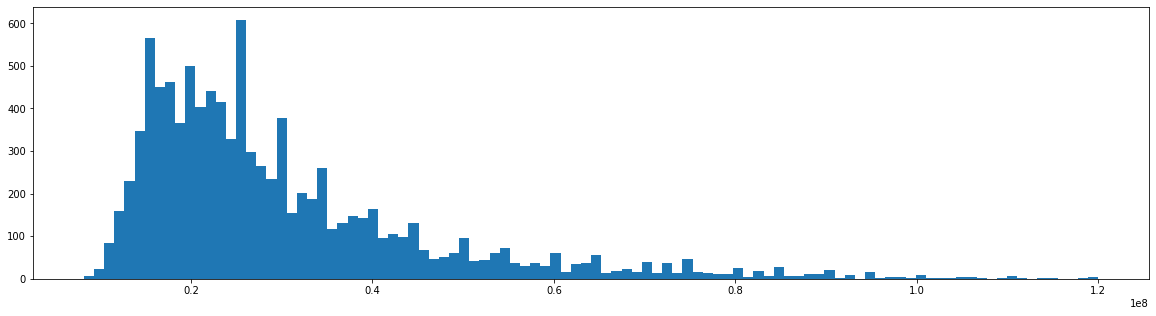

In [10]:
from matplotlib import pyplot as plt
plt.hist(df_alm.price, bins=100);

In [11]:
import seaborn as sns

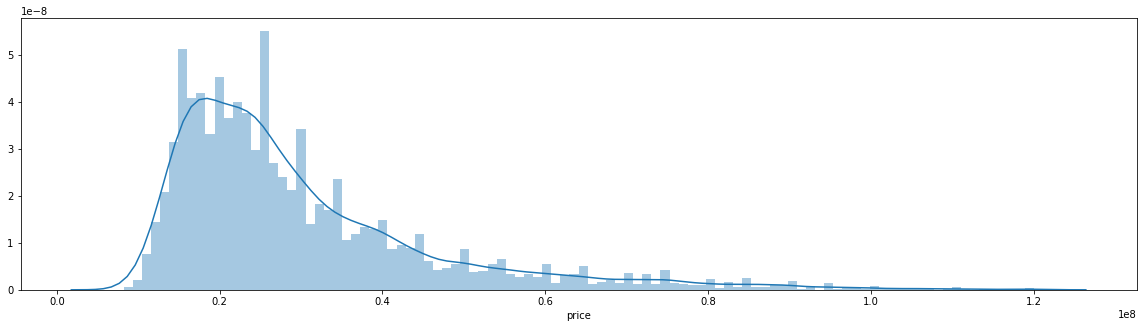

In [12]:
sns.distplot(df_alm.price, bins=100);

In [13]:
import numpy as np
np.std(df_alm.price)

16624104.552553339

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y = df_alm[['price']]
X = pd.get_dummies(df_alm.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8901969202581622
3616262.920840414


In [5]:
y_pred2 = forest.predict(X_train)
print(r2_score(y_train, y_pred2))
print(mean_absolute_error(y_train, y_pred2))

0.9838994530858911
1309098.9792515854


In [41]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
#df_pred.delta = df_pred.delta.apply(lambda x: int(x))
#df_pred = df_pred.sort_values(by='delta', ascending=False)
df_pred

,y_test,y_pred,delta
0,16990000,16924400,0.003861
1,15500000,15997000,0.032065
2,75000000,58554970,0.219267
3,37000000,53779940,0.453512
4,20000000,16834340,0.158283
...,...,...,...
2465,16500000,17692000,0.072242
2466,92000000,71236173,0.225694
2467,90000000,89305950,0.007712
2468,10500000,12614899,0.201419


In [42]:
df_pred.delta.mean()

0.11313119392445171

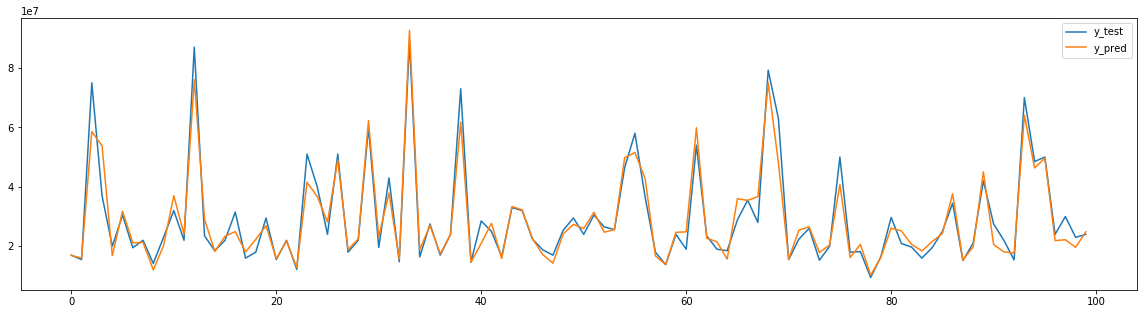

In [43]:
from matplotlib import pyplot as plt

plt.plot(df_pred[:100].y_test, label='y_test');
plt.plot(df_pred[:100].y_pred, label='y_pred');
plt.rcParams["figure.figsize"] = (20, 5);
plt.legend();

In [44]:
X

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,district_Алатауский,district_Алмалинский,district_Ауэзовский,district_Бостандыкский,district_Жетысуский,district_Медеуский,district_Наурызбайский,district_Турксибский,material_кирпичный,material_монолитный,material_панельный
6,2,1,2,49.2,1957,24.600000,63,0.500000,0,0,0,0,1,0,0,0,1,0,0
12,3,8,15,88.0,2015,29.333333,5,0.533333,0,0,0,1,0,0,0,0,0,1,0
15,3,9,15,82.0,2020,27.333333,0,0.600000,0,0,0,0,0,0,1,0,0,1,0
22,2,10,14,56.0,2016,28.000000,4,0.714286,0,1,0,0,0,0,0,0,0,1,0
27,2,5,5,45.1,1975,22.550000,45,1.000000,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20037,5,9,12,135.5,2020,27.100000,0,0.750000,0,1,0,0,0,0,0,0,0,1,0
20038,3,2,5,81.4,1972,27.133333,48,0.400000,0,0,0,0,0,1,0,0,1,0,0
20042,2,2,5,42.0,1978,21.000000,42,0.400000,0,0,1,0,0,0,0,0,1,0,0
20043,3,5,9,100.0,2009,33.333333,11,0.555556,0,0,1,0,0,0,0,0,0,1,0


In [46]:
forest.predict([[2, 3, 5, 50, 1980, 25, 40, 0.6, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]])

array([20483001.44])

In [48]:
len(X_train), len(X_test)

(7409, 2470)

In [49]:
def def_district(x):
    if x.find('Есиль') != -1:
        return 'Есиль'
    if x.find('Байконур') != -1:
        return 'Байконур'
    if x.find('Алматы') != -1:
        return 'Алматы'
    if x.find('Сарыарка') != -1:
        return 'Сарыарка'
    else:
        return ''
    

df_ast = df[df.city.str.contains('Нур-Султан')]
df_ast.title = df_ast.title.apply(lambda x: x.strip())
df_ast = df_ast[df_ast.floor.notnull()]
df_ast = df_ast[df_ast.floor.str.contains('из')]
df_ast['rooms'] = df_ast.title.apply(lambda x: int(x.split('-')[0]))
df_ast['start_floor'] = df_ast.floor.apply(lambda x: int(x.split()[0]))
df_ast['end_floor'] = df_ast.floor.apply(lambda x: int(x.split()[2]))
df_ast.price = df_ast.price.apply(lambda x: x.strip())
df_ast.price = df_ast.price.apply(lambda x: int("".join(x.split())))
df_ast = df_ast[df_ast.city != 'Нур-Султан (Астана)']
df_ast['area_'] = df_ast.area.apply(lambda x: float(x.split()[0]))
df_ast['year'] = df_ast.house.apply(lambda x: int(x.split()[1]) if len(x.split()) == 3 else int(x.split()[0]))
df_ast['district'] = df_ast.city.apply(lambda x: def_district(x))
df_ast = df_ast[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'district', 'price']]
df_ast.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'district', 'price']
df_ast = df_ast.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year', 'district'], keep='last')
df_ast = df_ast[df_ast.year <= curr_year]

df_years = df_ast.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_ast['price_per_area'] = df_ast.price/df_ast.area

max_area = np.percentile(df_ast.area, q=96)
min_area = np.percentile(df_ast.area, q=4)

max_price = np.percentile(df_ast.price_per_area, q=96)
min_price = np.percentile(df_ast.price_per_area, q=4)

df_ast = df_ast[df_ast.year.isin(years)]
df_ast = df_ast[(df_ast.area >= min_area)&(df_ast.area <= max_area)]
df_ast = df_ast[(df_ast.price_per_area >= min_price)&(df_ast.price_per_area <= max_price)]

df_ast['area_per_room'] = df_ast.area/df_ast.rooms
df_ast['oldness'] = curr_year - df_ast.year
df_ast['floorness'] = df_ast.start_floor/df_ast.end_floor
df_ast = df_ast[['rooms', 'start_floor', 'end_floor', 'area', 'district',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_ast

,rooms,start_floor,end_floor,area,district,year,area_per_room,oldness,floorness,price
19981,3,10,13,70.30,Есиль,2017,23.433333,3,0.769231,24500000
19988,3,16,18,92.30,Сарыарка,2009,30.766667,11,0.888889,29000000
19989,2,4,8,81.92,Есиль,2020,40.960000,0,0.500000,35900000
19992,2,16,18,60.00,Есиль,2015,30.000000,5,0.888889,27500000
19996,3,6,9,112.00,Есиль,2016,37.333333,4,0.666667,59900000
...,...,...,...,...,...,...,...,...,...,...
25756,1,6,7,48.00,Есиль,2017,48.000000,3,0.857143,23500000
25757,3,5,5,90.00,Байконур,2005,30.000000,15,1.000000,23000000
25758,3,4,5,58.00,Алматы,1975,19.333333,45,0.800000,16300000
25759,2,4,9,53.00,Есиль,2011,26.500000,9,0.444444,20700000


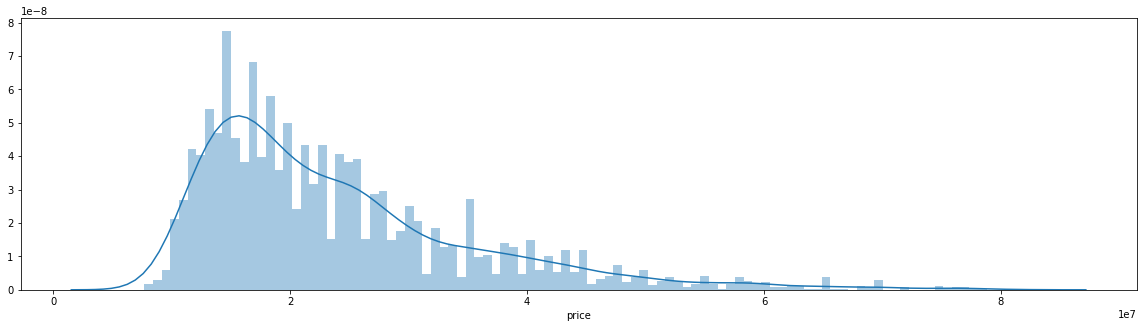

In [15]:
sns.distplot(df_ast.price, bins=100);

In [50]:
y = df_ast[['price']]
X = pd.get_dummies(df_ast.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8562920626506324
3039523.1959973974


In [51]:
len(X_train), len(X_test)

(2745, 915)

In [52]:
X

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,district_Алматы,district_Байконур,district_Есиль,district_Сарыарка
19981,3,10,13,70.30,2017,23.433333,3,0.769231,0,0,1,0
19988,3,16,18,92.30,2009,30.766667,11,0.888889,0,0,0,1
19989,2,4,8,81.92,2020,40.960000,0,0.500000,0,0,1,0
19992,2,16,18,60.00,2015,30.000000,5,0.888889,0,0,1,0
19996,3,6,9,112.00,2016,37.333333,4,0.666667,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25756,1,6,7,48.00,2017,48.000000,3,0.857143,0,0,1,0
25757,3,5,5,90.00,2005,30.000000,15,1.000000,0,1,0,0
25758,3,4,5,58.00,1975,19.333333,45,0.800000,1,0,0,0
25759,2,4,9,53.00,2011,26.500000,9,0.444444,0,0,1,0


In [53]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred

,y_test,y_pred,delta
0,37000000,33893000,0.083973
1,24000000,21150840,0.118715
2,16500000,12495143,0.242719
3,30000000,29032999,0.032233
4,20000000,30091160,0.504558
...,...,...,...
910,35000000,32189599,0.080297
911,14000000,15464031,0.104574
912,15000000,16697499,0.113167
913,14800000,15091000,0.019662


In [54]:
df_pred.delta.mean()

0.12333267829099571

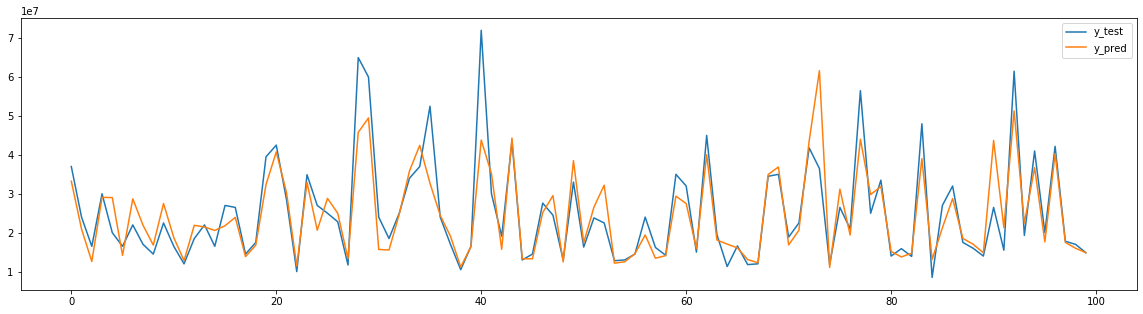

In [18]:
plt.rcParams["figure.figsize"] = (20, 5)
plt.plot(df_pred.y_test[:100], label='y_test');
plt.plot(df_pred.y_pred[:100], label='y_pred');
plt.legend();

In [55]:
df_shym = df[df.city.str.contains('Шымкент')]
df_shym.title = df_shym.title.apply(lambda x: x.strip())
df_shym['rooms'] = df_shym.title.apply(lambda x: int(x.split('-')[0]))
df_shym.price = df_shym.price.apply(lambda x: x.strip())
df_shym.price = df_shym.price.apply(lambda x: int("".join(x.split())))
df_shym = df_shym[df_shym.floor.notnull()]
df_shym = df_shym[df_shym.floor.str.contains('из')]
df_shym['start_floor'] = df_shym.floor.apply(lambda x: int(x.split()[0]))
df_shym['end_floor'] = df_shym.floor.apply(lambda x: int(x.split()[2]))
df_shym['area_'] = df_shym.area.apply(lambda x: float(x.split()[0]))
df_shym = df_shym[df_shym.city != 'Шымкент']
df_shym['district'] = df_shym.city.apply(lambda x: x.split()[1])
df_shym = df_shym[df_shym.house.apply(lambda x: len(x.split())) > 1]
df_shym['year'] = df_shym.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_shym = df_shym[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'district', 'price']]
df_shym.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'district', 'price']
df_shym = df_shym.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year', 'district'], keep='last')
df_shym = df_shym[df_shym.year <= curr_year]

df_years = df_shym.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_shym['price_per_area'] = df_shym.price/df_shym.area

max_area = np.percentile(df_shym.area, q=96)
min_area = np.percentile(df_shym.area, q=4)

max_price = np.percentile(df_shym.price_per_area, q=96)
min_price = np.percentile(df_shym.price_per_area, q=4)

df_shym = df_shym[df_shym.year.isin(years)]
df_shym = df_shym[(df_shym.area >= min_area)&(df_shym.area <= max_area)]
df_shym = df_shym[(df_shym.price_per_area >= min_price)&(df_shym.price_per_area <= max_price)]

df_shym['area_per_room'] = df_shym.area/df_shym.rooms
df_shym['oldness'] = curr_year - df_shym.year
df_shym['floorness'] = df_shym.start_floor/df_shym.end_floor
df_shym = df_shym[['rooms', 'start_floor', 'end_floor', 'area', 'district',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_shym

,rooms,start_floor,end_floor,area,district,year,area_per_room,oldness,floorness,price
25641,3,3,5,78.0,Каратауский,1997,26.0,23,0.600000,25500000
25642,1,5,9,57.0,Каратауский,2018,57.0,2,0.555556,18500000
25643,4,5,5,88.0,Аль-Фарабийский,1992,22.0,28,1.000000,25000000
25644,2,1,5,48.8,Енбекшинский,1982,24.4,38,0.200000,18000000
25648,3,5,5,61.2,Абайский,1987,20.4,33,1.000000,17000000
...,...,...,...,...,...,...,...,...,...,...
29639,2,5,5,60.0,Енбекшинский,2013,30.0,7,1.000000,20000000
29640,4,2,5,82.0,Енбекшинский,1990,20.5,30,0.400000,20000000
29641,2,3,4,52.2,Енбекшинский,1965,26.1,55,0.750000,12500000
29642,3,1,2,60.0,Аль-Фарабийский,1980,20.0,40,0.500000,17000000


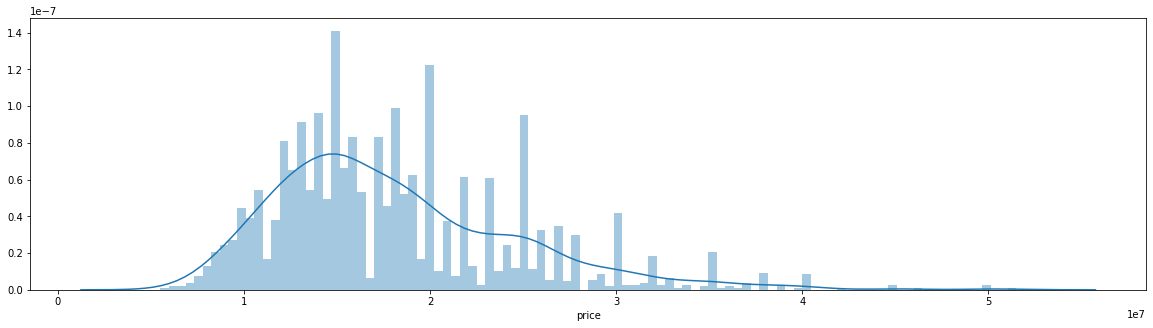

In [20]:
sns.distplot(df_shym.price, bins=100);

In [56]:
y = df_shym[['price']]
X = pd.get_dummies(df_shym.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.7617369865561738
2325583.145759005


In [57]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred

,y_test,y_pred,delta
0,25000000,22031000,0.118760
1,11700000,12109000,0.034957
2,18000000,16653000,0.074833
3,16500000,14682000,0.110182
4,13000000,15053000,0.157923
...,...,...,...
578,35000000,27938000,0.201771
579,17000000,15413000,0.093353
580,23000000,23440000,0.019130
581,17000000,21045000,0.237941


In [58]:
df_pred.delta.mean()

0.13192008656105936

In [59]:
X

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,district_Абайский,district_Аль-Фарабийский,district_Енбекшинский,district_Каратауский
25641,3,3,5,78.0,1997,26.0,23,0.600000,0,0,0,1
25642,1,5,9,57.0,2018,57.0,2,0.555556,0,0,0,1
25643,4,5,5,88.0,1992,22.0,28,1.000000,0,1,0,0
25644,2,1,5,48.8,1982,24.4,38,0.200000,0,0,1,0
25648,3,5,5,61.2,1987,20.4,33,1.000000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29639,2,5,5,60.0,2013,30.0,7,1.000000,0,0,1,0
29640,4,2,5,82.0,1990,20.5,30,0.400000,0,0,1,0
29641,2,3,4,52.2,1965,26.1,55,0.750000,0,0,1,0
29642,3,1,2,60.0,1980,20.0,40,0.500000,0,1,0,0


In [60]:
len(X_train), len(X_test)

(1747, 583)

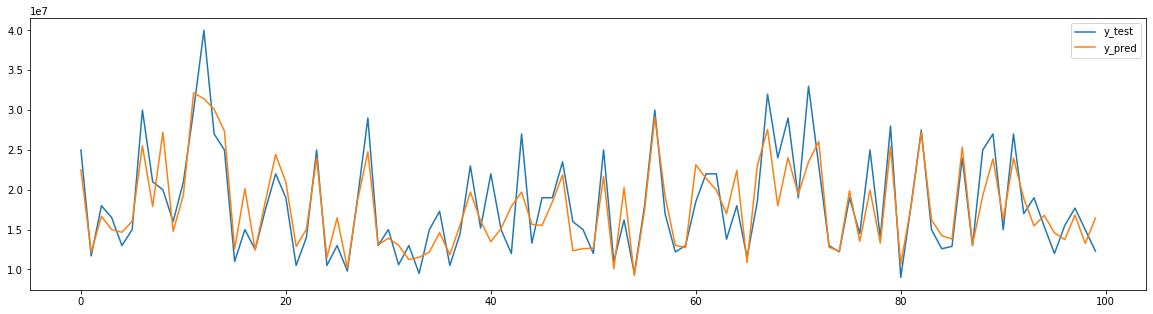

In [23]:
plt.plot(df_pred.y_test[:100], label='y_test');
plt.plot(df_pred.y_pred[:100], label='y_pred');
plt.legend();

In [61]:
df_akm = df[df.city.str.contains('Акмолинская обл.')]
df_akm.title = df_akm.title.apply(lambda x: x.strip())
df_akm['rooms'] = df_akm.title.apply(lambda x: int(x.split('-')[0]))
df_akm.price = df_akm.price.apply(lambda x: x.strip())
df_akm.price = df_akm.price.apply(lambda x: int("".join(x.split())))
df_akm = df_akm[df_akm.floor.notnull()]
df_akm = df_akm[df_akm.floor.str.contains('из')]
df_akm['start_floor'] = df_akm.floor.apply(lambda x: int(x.split()[0]))
df_akm['end_floor'] = df_akm.floor.apply(lambda x: int(x.split()[2]))
df_akm = df_akm[df_akm.area.notnull()]
df_akm['area_'] = df_akm.area.apply(lambda x: float(x.split()[0]))
df_akm = df_akm[df_akm.house.apply(lambda x: len(x.split())) > 1]
df_akm['year'] = df_akm.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_akm = df_akm[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
df_akm.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
df_akm = df_akm.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
df_akm = df_akm[df_akm.year <= curr_year]


df_years = df_akm.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_akm['price_per_area'] = df_akm.price/df_akm.area

max_area = np.percentile(df_akm.area, q=96)
min_area = np.percentile(df_akm.area, q=4)

max_price = np.percentile(df_akm.price_per_area, q=96)
min_price = np.percentile(df_akm.price_per_area, q=4)

df_akm = df_akm[df_akm.year.isin(years)]
df_akm = df_akm[(df_akm.area >= min_area)&(df_akm.area <= max_area)]
df_akm = df_akm[(df_akm.price_per_area >= min_price)&(df_akm.price_per_area <= max_price)]

df_akm['area_per_room'] = df_akm.area/df_akm.rooms
df_akm['oldness'] = curr_year - df_akm.year
df_akm['floorness'] = df_akm.start_floor/df_akm.end_floor
df_akm = df_akm[['rooms', 'start_floor', 'end_floor', 'area',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]

df_akm

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,price
29643,2,1,5,41.0,1978,20.500000,42,0.200000,11000000
29647,1,3,5,35.0,2011,35.000000,9,0.600000,9500000
29649,1,5,5,34.0,2011,34.000000,9,1.000000,9400000
29650,3,1,4,57.6,1968,19.200000,52,0.250000,15000000
29652,1,4,5,29.0,2007,29.000000,13,0.800000,6900000
...,...,...,...,...,...,...,...,...,...
33217,3,2,5,82.0,1994,27.333333,26,0.400000,22000000
33218,1,1,6,34.0,1995,34.000000,25,0.166667,9300000
33219,1,1,9,33.0,2016,33.000000,4,0.111111,7500000
33220,4,2,5,61.6,1987,15.400000,33,0.400000,10800000


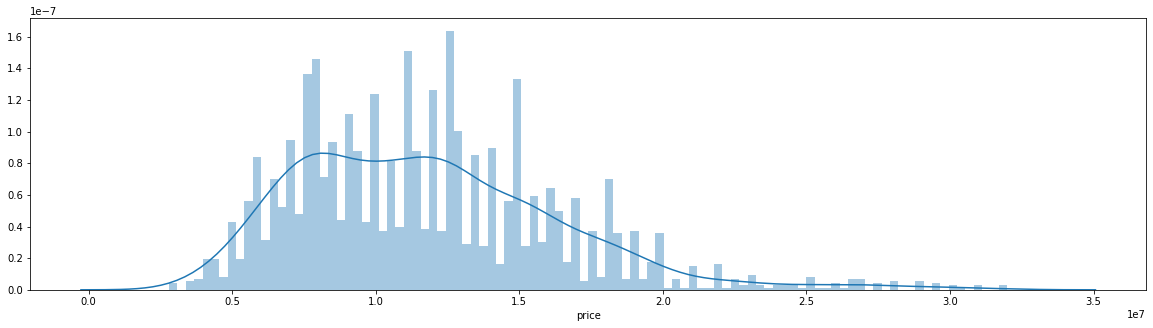

In [25]:
sns.distplot(df_akm.price, bins=100);

In [62]:
y = df_akm[['price']]
X = pd.get_dummies(df_akm.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.6935472934317117
1824187.0807223113


In [63]:
len(X_train), len(X_test)

(1868, 623)

In [64]:
X

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness
29643,2,1,5,41.0,1978,20.500000,42,0.200000
29647,1,3,5,35.0,2011,35.000000,9,0.600000
29649,1,5,5,34.0,2011,34.000000,9,1.000000
29650,3,1,4,57.6,1968,19.200000,52,0.250000
29652,1,4,5,29.0,2007,29.000000,13,0.800000
...,...,...,...,...,...,...,...,...
33217,3,2,5,82.0,1994,27.333333,26,0.400000
33218,1,1,6,34.0,1995,34.000000,25,0.166667
33219,1,1,9,33.0,2016,33.000000,4,0.111111
33220,4,2,5,61.6,1987,15.400000,33,0.400000


In [65]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred

,y_test,y_pred,delta
0,9200000,8289000,0.099022
1,6800000,11181000,0.644265
2,15640000,18112370,0.158080
3,8000000,7450000,0.068750
4,8000000,6609000,0.173875
...,...,...,...
618,15000000,16215000,0.081000
619,17500000,16648000,0.048686
620,16100000,15783100,0.019683
621,4300000,6768000,0.573953


In [66]:
df_pred.delta.mean()

0.17554524904649021

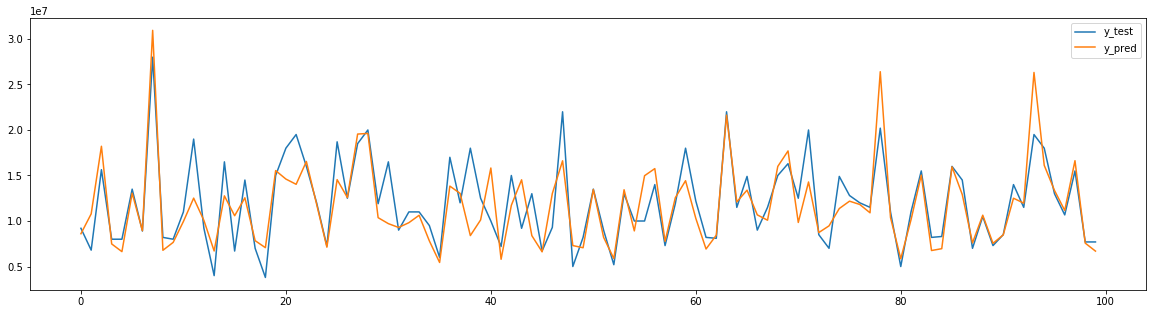

In [28]:
plt.plot(df_pred.y_test[:100], label='y_test');
plt.plot(df_pred.y_pred[:100], label='y_pred');
plt.legend();

In [67]:
df_akt = df[(df.city.str.contains('Актобе')) | (df.city.str.contains('Актюбинская обл'))]
df_akt.title = df_akt.title.apply(lambda x: x.strip())
df_akt['rooms'] = df_akt.title.apply(lambda x: int(x.split('-')[0]))
df_akt.price = df_akt.price.apply(lambda x: x.strip())
df_akt = df_akt[~df_akt.price.str.contains('от')]
df_akt.price = df_akt.price.apply(lambda x: int("".join(x.split())))
df_akt = df_akt[df_akt.floor.notnull()]
df_akt = df_akt[df_akt.floor.str.contains('из')]
df_akt['start_floor'] = df_akt.floor.apply(lambda x: int(x.split()[0]))
df_akt['end_floor'] = df_akt.floor.apply(lambda x: int(x.split()[2]))
df_akt = df_akt[df_akt.area.notnull()]
df_akt['area_'] = df_akt.area.apply(lambda x: float(x.split()[0]))
df_akt = df_akt[df_akt.house.apply(lambda x: len(x.split())) > 1]
df_akt['year'] = df_akt.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_akt = df_akt[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
df_akt.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
df_akt = df_akt.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
df_akt = df_akt[df_akt.year <= curr_year]


df_years = df_akt.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_akt['price_per_area'] = df_akt.price/df_akt.area

max_area = np.percentile(df_akt.area, q=96)
min_area = np.percentile(df_akt.area, q=4)

max_price = np.percentile(df_akt.price_per_area, q=96)
min_price = np.percentile(df_akt.price_per_area, q=4)

df_akt = df_akt[df_akt.year.isin(years)]
df_akt = df_akt[(df_akt.area >= min_area)&(df_akt.area <= max_area)]
df_akt = df_akt[(df_akt.price_per_area >= min_price)&(df_akt.price_per_area <= max_price)]

df_akt['area_per_room'] = df_akt.area/df_akt.rooms
df_akt['oldness'] = curr_year - df_akt.year
df_akt['floorness'] = df_akt.start_floor/df_akt.end_floor
df_akt = df_akt[['rooms', 'start_floor', 'end_floor', 'area',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_akt

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,price
33223,3,7,9,63.0,1984,21.000000,36,0.777778,13000000
33224,2,5,5,53.0,1989,26.500000,31,1.000000,5500000
33226,1,4,8,53.0,2012,53.000000,8,0.500000,13000000
33227,3,4,5,48.0,1969,16.000000,51,0.800000,8000000
33228,3,7,9,102.2,2006,34.066667,14,0.777778,15600000
...,...,...,...,...,...,...,...,...,...
40376,1,7,7,34.5,2014,34.500000,6,1.000000,6300000
40378,1,2,5,33.0,1987,33.000000,33,0.400000,6200000
40379,2,1,7,70.0,2020,35.000000,0,0.142857,12500000
40380,3,1,5,95.0,2015,31.666667,5,0.200000,23000000


In [68]:
y = df_akt[['price']]
X = pd.get_dummies(df_akt.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8725850026596895
1708903.7817652174


In [69]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred

,y_test,y_pred,delta
0,11000000,9167380,0.166602
1,19000000,25720000,0.353684
2,9000000,8759000,0.026778
3,14000000,10021460,0.284181
4,15500000,18551000,0.196839
...,...,...,...
1145,33000000,26727555,0.190074
1146,6000000,7663300,0.277217
1147,7000000,6205000,0.113571
1148,13500000,14031500,0.039370


In [70]:
df_pred.delta.mean()

0.15158676880169417

In [71]:
len(X_train), len(X_test)

(3447, 1150)

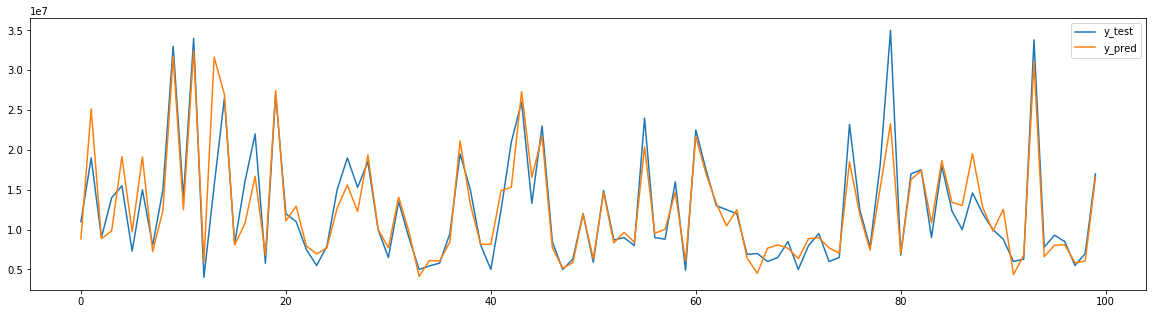

In [32]:
plt.plot(df_pred[:100].y_test, label='y_test');
plt.plot(df_pred[:100].y_pred, label='y_pred');
plt.legend();

In [73]:
df_almo = df[df.city.str.contains('Алматинская обл')]
df_almo.title = df_almo.title.apply(lambda x: x.strip())
df_almo['rooms'] = df_almo.title.apply(lambda x: int(x.split('-')[0]))
df_almo.price = df_almo.price.apply(lambda x: x.strip())
df_almo = df_almo[~df_almo.price.str.contains('от')]
df_almo.price = df_almo.price.apply(lambda x: int("".join(x.split())))
df_almo = df_almo[df_almo.floor.notnull()]
df_almo = df_almo[df_almo.floor.str.contains('из')]
df_almo['start_floor'] = df_almo.floor.apply(lambda x: int(x.split()[0]))
df_almo['end_floor'] = df_almo.floor.apply(lambda x: int(x.split()[2]))
df_almo = df_almo[df_almo.area.notnull()]
df_almo['area_'] = df_almo.area.apply(lambda x: float(x.split()[0]))
df_almo = df_almo[df_almo.house.apply(lambda x: len(x.split())) > 1]
df_almo['year'] = df_almo.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_almo = df_almo[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
df_almo.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
df_almo = df_almo.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
df_almo = df_almo[df_almo.year <= curr_year]


df_years = df_almo.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_almo['price_per_area'] = df_almo.price/df_almo.area

max_area = np.percentile(df_almo.area, q=96)
min_area = np.percentile(df_almo.area, q=4)

max_price = np.percentile(df_almo.price_per_area, q=96)
min_price = np.percentile(df_almo.price_per_area, q=4)

df_almo = df_almo[df_almo.year.isin(years)]
df_almo = df_almo[(df_almo.area >= min_area)&(df_almo.area <= max_area)]
df_almo = df_almo[(df_almo.price_per_area >= min_price)&(df_almo.price_per_area <= max_price)]

df_almo['area_per_room'] = df_almo.area/df_almo.rooms
df_almo['oldness'] = curr_year - df_almo.year
df_almo['floorness'] = df_almo.start_floor/df_almo.end_floor
df_almo = df_almo[['rooms', 'start_floor', 'end_floor', 'area',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_almo

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,price
40384,3,3,5,78.0,1992,26.00,28,0.6,17000000
40385,1,3,5,35.2,1990,35.20,30,0.6,6000000
40386,2,1,5,44.0,1975,22.00,45,0.2,8500000
40387,3,5,5,64.8,1986,21.60,34,1.0,10500000
40388,2,5,5,49.0,1969,24.50,51,1.0,13000000
...,...,...,...,...,...,...,...,...,...
44394,2,5,5,44.6,1981,22.30,39,1.0,7500000
44395,2,1,5,55.0,2006,27.50,14,0.2,13500000
44397,2,4,5,56.3,1990,28.15,30,0.8,12000000
44398,2,2,5,42.0,1972,21.00,48,0.4,11200000


In [74]:
y = df_almo[['price']]
X = pd.get_dummies(df_almo.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.6594640835667782
1930049.2680675287


In [75]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred

,y_test,y_pred,delta
0,18500000,21778999,0.177243
1,6500000,6632000,0.020308
2,11000000,13648570,0.240779
3,9500000,12218980,0.286208
4,15000000,12574000,0.161733
...,...,...,...
691,15500000,14965000,0.034516
692,6700000,8785000,0.311194
693,12500000,14668555,0.173484
694,13000000,8980350,0.309204


In [76]:
df_pred.delta.mean()

0.17059157710571662

In [77]:
len(X_train), len(X_test)

(2085, 696)

In [78]:
df_aty = df[(df.city.str.contains('Атырау')) | (df.city.str.contains('Атырауская обл'))]
df_aty.title = df_aty.title.apply(lambda x: x.strip())
df_aty['rooms'] = df_aty.title.apply(lambda x: int(x.split('-')[0]))
df_aty.price = df_aty.price.apply(lambda x: x.strip())
df_aty = df_aty[~df_aty.price.str.contains('от')]
df_aty.price = df_aty.price.apply(lambda x: int("".join(x.split())))
df_aty = df_aty[df_aty.floor.notnull()]
df_aty = df_aty[df_aty.floor.str.contains('из')]
df_aty['start_floor'] = df_aty.floor.apply(lambda x: int(x.split()[0]))
df_aty['end_floor'] = df_aty.floor.apply(lambda x: int(x.split()[2]))
df_aty = df_aty[df_aty.area.notnull()]
df_aty['area_'] = df_aty.area.apply(lambda x: float(x.split()[0]))
df_aty = df_aty[df_aty.house.apply(lambda x: len(x.split())) > 1]
df_aty['year'] = df_aty.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_aty = df_aty[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
df_aty.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
df_aty = df_aty.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
df_aty = df_aty[df_aty.year <= curr_year]


df_years = df_aty.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_aty['price_per_area'] = df_aty.price/df_aty.area

max_area = np.percentile(df_aty.area, q=96)
min_area = np.percentile(df_aty.area, q=4)

max_price = np.percentile(df_aty.price_per_area, q=96)
min_price = np.percentile(df_aty.price_per_area, q=4)

df_aty = df_aty[df_aty.year.isin(years)]
df_aty = df_aty[(df_aty.area >= min_area)&(df_aty.area <= max_area)]
df_aty = df_aty[(df_aty.price_per_area >= min_price)&(df_aty.price_per_area <= max_price)]

df_aty['area_per_room'] = df_aty.area/df_aty.rooms
df_aty['oldness'] = curr_year - df_aty.year
df_aty['floorness'] = df_aty.start_floor/df_aty.end_floor
df_aty = df_aty[['rooms', 'start_floor', 'end_floor', 'area',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_aty

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,price
44396,3,5,9,97.9,2005,32.633333,15,0.555556,35000000
44401,2,2,5,69.5,2009,34.750000,11,0.400000,18000000
44402,2,1,9,69.0,2007,34.500000,13,0.111111,18000000
44403,2,9,9,97.0,2006,48.500000,14,1.000000,22500000
44404,3,3,5,60.3,1977,20.100000,43,0.600000,9000000
...,...,...,...,...,...,...,...,...,...
47878,3,1,5,54.0,1982,18.000000,38,0.200000,12800000
47879,3,4,5,60.0,1984,20.000000,36,0.800000,14000000
47880,2,4,6,50.0,2017,25.000000,3,0.666667,15000000
47882,3,1,2,72.0,1978,24.000000,42,0.500000,13000000


In [79]:
y = df_aty[['price']]
X = pd.get_dummies(df_aty.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.7557146856045717
2875053.568335901


In [80]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred.delta.mean()

0.17197540099151587

In [81]:
len(X_train), len(X_test)

(1947, 649)

In [82]:
df_vos = df[df.city.str.contains('Восточно-Казахстанская обл')]
df_vos.title = df_vos.title.apply(lambda x: x.strip())
df_vos['rooms'] = df_vos.title.apply(lambda x: int(x.split('-')[0]))
df_vos.price = df_vos.price.apply(lambda x: x.strip())
df_vos = df_vos[~df_vos.price.str.contains('от')]
df_vos.price = df_vos.price.apply(lambda x: int("".join(x.split())))
df_vos = df_vos[df_vos.floor.notnull()]
df_vos = df_vos[df_vos.floor.str.contains('из')]
df_vos['start_floor'] = df_vos.floor.apply(lambda x: int(x.split()[0]))
df_vos['end_floor'] = df_vos.floor.apply(lambda x: int(x.split()[2]))
df_vos = df_vos[df_vos.area.notnull()]
df_vos['area_'] = df_vos.area.apply(lambda x: float(x.split()[0]))
df_vos = df_vos[df_vos.house.apply(lambda x: len(x.split())) > 1]
df_vos['year'] = df_vos.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_vos = df_vos[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
df_vos.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
df_vos = df_vos.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
df_vos = df_vos[df_vos.year <= curr_year]


df_years = df_vos.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_vos['price_per_area'] = df_vos.price/df_vos.area

max_area = np.percentile(df_vos.area, q=96)
min_area = np.percentile(df_vos.area, q=4)

max_price = np.percentile(df_vos.price_per_area, q=96)
min_price = np.percentile(df_vos.price_per_area, q=4)

df_vos = df_vos[df_vos.year.isin(years)]
df_vos = df_vos[(df_vos.area >= min_area)&(df_vos.area <= max_area)]
df_vos = df_vos[(df_vos.price_per_area >= min_price)&(df_vos.price_per_area <= max_price)]

df_vos['area_per_room'] = df_vos.area/df_vos.rooms
df_vos['oldness'] = curr_year - df_vos.year
df_vos['floorness'] = df_vos.start_floor/df_vos.end_floor
df_vos = df_vos[['rooms', 'start_floor', 'end_floor', 'area',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_vos

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,price
47884,2,8,9,36.0,1986,18.000,34,0.888889,6500000
47887,2,2,5,47.0,1960,23.500,60,0.400000,13250000
47888,1,8,9,33.0,1989,33.000,31,0.888889,11600000
47889,4,5,5,76.3,1974,19.075,46,1.000000,18300000
47890,2,1,5,42.1,1967,21.050,53,0.200000,9500000
...,...,...,...,...,...,...,...,...,...
51922,1,2,10,31.3,1980,31.300,40,0.200000,8000000
51923,2,1,2,46.0,2000,23.000,20,0.500000,6000000
51924,3,1,5,66.0,1982,22.000,38,0.200000,14000000
51925,2,7,9,57.0,1990,28.500,30,0.777778,14500000


In [83]:
y = df_vos[['price']]
X = pd.get_dummies(df_vos.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.6059536732111392
2269984.3814


In [84]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred.delta.mean()

0.20198639180491837

In [85]:
len(X_train), len(X_test)

(2249, 750)

In [86]:
df_jam = df[df.city.str.contains('Жамбылская обл')]
df_jam.title = df_jam.title.apply(lambda x: x.strip())
df_jam['rooms'] = df_jam.title.apply(lambda x: int(x.split('-')[0]))
df_jam.price = df_jam.price.apply(lambda x: x.strip())
df_jam = df_jam[~df_jam.price.str.contains('от')]
df_jam.price = df_jam.price.apply(lambda x: int("".join(x.split())))
df_jam = df_jam[df_jam.floor.notnull()]
df_jam = df_jam[df_jam.floor.str.contains('из')]
df_jam['start_floor'] = df_jam.floor.apply(lambda x: int(x.split()[0]))
df_jam['end_floor'] = df_jam.floor.apply(lambda x: int(x.split()[2]))
df_jam = df_jam[df_jam.area.notnull()]
df_jam['area_'] = df_jam.area.apply(lambda x: float(x.split()[0]))
df_jam = df_jam[df_jam.house.apply(lambda x: len(x.split())) > 1]
df_jam['year'] = df_jam.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_jam = df_jam[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
df_jam.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
df_jam = df_jam.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
df_jam = df_jam[df_jam.year <= curr_year]


df_years = df_jam.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_jam['price_per_area'] = df_jam.price/df_jam.area

max_area = np.percentile(df_jam.area, q=96)
min_area = np.percentile(df_jam.area, q=4)

max_price = np.percentile(df_jam.price_per_area, q=96)
min_price = np.percentile(df_jam.price_per_area, q=4)

df_jam = df_jam[df_jam.year.isin(years)]
df_jam = df_jam[(df_jam.area >= min_area)&(df_jam.area <= max_area)]
df_jam = df_jam[(df_jam.price_per_area >= min_price)&(df_jam.price_per_area <= max_price)]

df_jam['area_per_room'] = df_jam.area/df_jam.rooms
df_jam['oldness'] = curr_year - df_jam.year
df_jam['floorness'] = df_jam.start_floor/df_jam.end_floor
df_jam = df_jam[['rooms', 'start_floor', 'end_floor', 'area',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_jam

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,price
51868,2,1,5,43.0,1972,21.500000,48,0.200000,7500000
51869,3,1,5,68.0,1989,22.666667,31,0.200000,14500000
51870,3,4,5,63.6,1972,21.200000,48,0.800000,10000000
51871,3,5,5,90.4,2008,30.133333,12,1.000000,20000000
51872,4,8,12,92.0,1990,23.000000,30,0.666667,16500000
...,...,...,...,...,...,...,...,...,...
55841,2,4,4,52.0,2007,26.000000,13,1.000000,6000000
55842,1,5,5,38.0,1975,38.000000,45,1.000000,5500000
55843,3,5,5,69.0,1985,23.000000,35,1.000000,16000000
55844,3,3,5,68.0,1979,22.666667,41,0.600000,14500000


In [87]:
y = df_jam[['price']]
X = pd.get_dummies(df_jam.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.6665652950174192
1709940.1061471861


In [88]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred.delta.mean()

0.15893597708012716

In [89]:
len(X_train), len(X_test)

(2076, 693)

In [90]:
df_zap = df[(df.city.str.contains('Уральск')) | (df.city.str.contains('Западно-Казахстанская обл'))]
df_zap.title = df_zap.title.apply(lambda x: x.strip())
df_zap['rooms'] = df_zap.title.apply(lambda x: int(x.split('-')[0]))
df_zap.price = df_zap.price.apply(lambda x: x.strip())
df_zap = df_zap[~df_zap.price.str.contains('от')]
df_zap.price = df_zap.price.apply(lambda x: int("".join(x.split())))
df_zap = df_zap[df_zap.floor.notnull()]
df_zap = df_zap[df_zap.floor.str.contains('из')]
df_zap['start_floor'] = df_zap.floor.apply(lambda x: int(x.split()[0]))
df_zap['end_floor'] = df_zap.floor.apply(lambda x: int(x.split()[2]))
df_zap = df_zap[df_zap.area.notnull()]
df_zap['area_'] = df_zap.area.apply(lambda x: float(x.split()[0]))
df_zap = df_zap[df_zap.house.apply(lambda x: len(x.split())) > 1]
df_zap['year'] = df_zap.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_zap = df_zap[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
df_zap.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
df_zap = df_zap.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
df_zap = df_zap[df_zap.year <= curr_year]


df_years = df_zap.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_zap['price_per_area'] = df_zap.price/df_zap.area

max_area = np.percentile(df_zap.area, q=96)
min_area = np.percentile(df_zap.area, q=4)

max_price = np.percentile(df_zap.price_per_area, q=96)
min_price = np.percentile(df_zap.price_per_area, q=4)

df_zap = df_zap[df_zap.year.isin(years)]
df_zap = df_zap[(df_zap.area >= min_area)&(df_zap.area <= max_area)]
df_zap = df_zap[(df_zap.price_per_area >= min_price)&(df_zap.price_per_area <= max_price)]

df_zap['area_per_room'] = df_zap.area/df_zap.rooms
df_zap['oldness'] = curr_year - df_zap.year
df_zap['floorness'] = df_zap.start_floor/df_zap.end_floor
df_zap = df_zap[['rooms', 'start_floor', 'end_floor', 'area',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_zap

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,price
55848,1,5,5,40.0,2009,40.000000,11,1.000000,10500000
55849,1,7,9,35.0,1989,35.000000,31,0.777778,9850000
55850,3,2,4,57.0,1968,19.000000,52,0.500000,10500000
55851,3,2,5,63.0,1984,21.000000,36,0.400000,12300000
55852,1,5,5,42.8,2014,42.800000,6,1.000000,9500000
...,...,...,...,...,...,...,...,...,...
59424,1,7,9,57.0,2017,57.000000,3,0.777778,14000000
59425,1,4,5,50.0,2015,50.000000,5,0.800000,9500000
59426,2,5,9,55.0,2006,27.500000,14,0.555556,13500000
59427,3,2,5,68.0,1993,22.666667,27,0.400000,20000000


In [91]:
y = df_zap[['price']]
X = pd.get_dummies(df_zap.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8082546288957104
1826263.2605319147


In [92]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred.delta.mean()

0.14226973207324853

In [93]:
len(X_train), len(X_test)

(1972, 658)

In [94]:
df_kar = df[(df.city.str.contains('Караганда')) | (df.city.str.contains('Карагандинская обл'))]
df_kar.title = df_kar.title.apply(lambda x: x.strip())
df_kar['rooms'] = df_kar.title.apply(lambda x: int(x.split('-')[0]))
df_kar.price = df_kar.price.apply(lambda x: x.strip())
df_kar = df_kar[~df_kar.price.str.contains('от')]
df_kar.price = df_kar.price.apply(lambda x: int("".join(x.split())))
df_kar = df_kar[df_kar.floor.notnull()]
df_kar = df_kar[df_kar.floor.str.contains('из')]
df_kar['start_floor'] = df_kar.floor.apply(lambda x: int(x.split()[0]))
df_kar['end_floor'] = df_kar.floor.apply(lambda x: int(x.split()[2]))
df_kar = df_kar[df_kar.area.notnull()]
df_kar['area_'] = df_kar.area.apply(lambda x: float(x.split()[0]))
df_kar = df_kar[df_kar.house.notnull()]
df_kar = df_kar[df_kar.house.apply(lambda x: len(x.split())) > 1]
df_kar['year'] = df_kar.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_kar = df_kar[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
df_kar.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
df_kar = df_kar.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
df_kar = df_kar[df_kar.year <= curr_year]


df_years = df_kar.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_kar['price_per_area'] = df_kar.price/df_kar.area

max_area = np.percentile(df_kar.area, q=96)
min_area = np.percentile(df_kar.area, q=4)

max_price = np.percentile(df_kar.price_per_area, q=96)
min_price = np.percentile(df_kar.price_per_area, q=4)

df_kar = df_kar[df_kar.year.isin(years)]
df_kar = df_kar[(df_kar.area >= min_area)&(df_kar.area <= max_area)]
df_kar = df_kar[(df_kar.price_per_area >= min_price)&(df_kar.price_per_area <= max_price)]

df_kar['area_per_room'] = df_kar.area/df_kar.rooms
df_kar['oldness'] = curr_year - df_kar.year
df_kar['floorness'] = df_kar.start_floor/df_kar.end_floor
df_kar = df_kar[['rooms', 'start_floor', 'end_floor', 'area',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_kar

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,price
59267,1,3,5,31.5,1968,31.500000,52,0.600000,6500000
59272,3,4,5,61.5,1974,20.500000,46,0.800000,12500000
59273,1,3,5,31.0,1962,31.000000,58,0.600000,3700000
59275,2,5,5,44.2,1972,22.100000,48,1.000000,4500000
59278,1,9,9,33.4,1982,33.400000,38,1.000000,7000000
...,...,...,...,...,...,...,...,...,...
62803,3,1,5,58.2,1963,19.400000,57,0.200000,13000000
62804,2,7,10,53.0,1990,26.500000,30,0.700000,18000000
62805,3,5,5,53.0,1972,17.666667,48,1.000000,6000000
62806,2,6,9,53.0,1980,26.500000,40,0.666667,6000000


In [95]:
y = df_kar[['price']]
X = pd.get_dummies(df_kar.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.5901340665108032
3025267.4442546587


In [96]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred.delta.mean()

0.2869784851052876

In [97]:
len(X_train), len(X_test)

(1932, 644)

In [98]:
df_kos = df[(df.city.str.contains('Костанай')) | (df.city.str.contains('Костанайская обл'))]
df_kos.title = df_kos.title.apply(lambda x: x.strip())
df_kos['rooms'] = df_kos.title.apply(lambda x: int(x.split('-')[0]))
df_kos.price = df_kos.price.apply(lambda x: x.strip())
df_kos = df_kos[~df_kos.price.str.contains('от')]
df_kos.price = df_kos.price.apply(lambda x: int("".join(x.split())))
df_kos = df_kos[df_kos.floor.notnull()]
df_kos = df_kos[df_kos.floor.str.contains('из')]
df_kos['start_floor'] = df_kos.floor.apply(lambda x: int(x.split()[0]))
df_kos['end_floor'] = df_kos.floor.apply(lambda x: int(x.split()[2]))
df_kos = df_kos[df_kos.area.notnull()]
df_kos['area_'] = df_kos.area.apply(lambda x: float(x.split()[0]))
df_kos = df_kos[df_kos.house.notnull()]
df_kos = df_kos[df_kos.house.apply(lambda x: len(x.split())) > 1]
df_kos['year'] = df_kos.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_kos = df_kos[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
df_kos.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
df_kos = df_kos.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
df_kos = df_kos[df_kos.year <= curr_year]


df_years = df_kos.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_kos['price_per_area'] = df_kos.price/df_kos.area

max_area = np.percentile(df_kos.area, q=96)
min_area = np.percentile(df_kos.area, q=4)

max_price = np.percentile(df_kos.price_per_area, q=96)
min_price = np.percentile(df_kos.price_per_area, q=4)

df_kos = df_kos[df_kos.year.isin(years)]
df_kos = df_kos[(df_kos.area >= min_area)&(df_kos.area <= max_area)]
df_kos = df_kos[(df_kos.price_per_area >= min_price)&(df_kos.price_per_area <= max_price)]

df_kos['area_per_room'] = df_kos.area/df_kos.rooms
df_kos['oldness'] = curr_year - df_kos.year
df_kos['floorness'] = df_kos.start_floor/df_kos.end_floor
df_kos = df_kos[['rooms', 'start_floor', 'end_floor', 'area',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_kos

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,price
62768,3,1,6,89.0,2008,29.666667,12,0.166667,18500000
62772,4,5,6,80.0,1988,20.000000,32,0.833333,18000000
62773,3,6,6,71.8,1990,23.933333,30,1.000000,18000000
62774,3,5,5,86.9,2014,28.966667,6,1.000000,17000000
62775,2,2,9,94.2,2020,47.100000,0,0.222222,20000000
...,...,...,...,...,...,...,...,...,...
66225,3,5,5,56.7,1970,18.900000,50,1.000000,13300000
66226,1,4,6,45.0,2009,45.000000,11,0.666667,12500000
66227,2,6,9,46.0,1965,23.000000,55,0.666667,14500000
66228,3,4,4,74.9,1987,24.966667,33,1.000000,20000000


In [99]:
y = df_kos[['price']]
X = pd.get_dummies(df_kos.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.7094180165191115
1980831.599892473


In [100]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred.delta.mean()

0.2049372711756106

In [101]:
len(X_train), len(X_test)

(1952, 651)

In [102]:
df_kyz = df[df.city.str.contains('Кызылординская обл')]
df_kyz.title = df_kyz.title.apply(lambda x: x.strip())
df_kyz['rooms'] = df_kyz.title.apply(lambda x: int(x.split('-')[0]))
df_kyz.price = df_kyz.price.apply(lambda x: x.strip())
df_kyz = df_kyz[~df_kyz.price.str.contains('от')]
df_kyz.price = df_kyz.price.apply(lambda x: int("".join(x.split())))
df_kyz = df_kyz[df_kyz.floor.notnull()]
df_kyz = df_kyz[df_kyz.floor.str.contains('из')]
df_kyz['start_floor'] = df_kyz.floor.apply(lambda x: int(x.split()[0]))
df_kyz['end_floor'] = df_kyz.floor.apply(lambda x: int(x.split()[2]))
df_kyz = df_kyz[df_kyz.area.notnull()]
df_kyz['area_'] = df_kyz.area.apply(lambda x: float(x.split()[0]))
df_kyz = df_kyz[df_kyz.house.notnull()]
df_kyz = df_kyz[df_kyz.house.apply(lambda x: len(x.split())) > 1]
df_kyz['year'] = df_kyz.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_kyz = df_kyz[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
df_kyz.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
df_kyz = df_kyz.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
df_kyz = df_kyz[df_kyz.year <= curr_year]


df_years = df_kyz.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_kyz['price_per_area'] = df_kyz.price/df_kyz.area

max_area = np.percentile(df_kyz.area, q=96)
min_area = np.percentile(df_kyz.area, q=4)

max_price = np.percentile(df_kyz.price_per_area, q=96)
min_price = np.percentile(df_kyz.price_per_area, q=4)

df_kyz = df_kyz[df_kyz.year.isin(years)]
df_kyz = df_kyz[(df_kyz.area >= min_area)&(df_kyz.area <= max_area)]
df_kyz = df_kyz[(df_kyz.price_per_area >= min_price)&(df_kyz.price_per_area <= max_price)]

df_kyz['area_per_room'] = df_kyz.area/df_kyz.rooms
df_kyz['oldness'] = curr_year - df_kyz.year
df_kyz['floorness'] = df_kyz.start_floor/df_kyz.end_floor
df_kyz = df_kyz[['rooms', 'start_floor', 'end_floor', 'area',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_kyz

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,price
66230,2,5,5,63.0,2010,31.500000,10,1.0,9000000
66231,2,2,5,65.0,2014,32.500000,6,0.4,15000000
66232,3,5,5,64.0,1979,21.333333,41,1.0,8000000
66233,3,2,5,65.0,1982,21.666667,38,0.4,12500000
66234,2,2,5,57.0,2015,28.500000,5,0.4,11700000
...,...,...,...,...,...,...,...,...,...
68006,3,5,5,65.0,1987,21.666667,33,1.0,6300000
68007,3,2,2,60.0,1991,20.000000,29,1.0,5500000
68008,2,3,5,49.0,1988,24.500000,32,0.6,8000000
68009,2,4,5,52.0,1984,26.000000,36,0.8,8500000


In [103]:
y = df_kyz[['price']]
X = pd.get_dummies(df_kyz.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.7007847698470411
1448552.1609846153


In [104]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred.delta.mean()

0.17924406556144953

In [105]:
len(X_train), len(X_test)

(973, 325)

In [106]:
df_man = df[(df.city.str.contains('Актау')) | (df.city.str.contains('Мангистауская обл'))]
df_man.title = df_man.title.apply(lambda x: x.strip())
df_man['rooms'] = df_man.title.apply(lambda x: int(x.split('-')[0]))
df_man.price = df_man.price.apply(lambda x: x.strip())
df_man = df_man[~df_man.price.str.contains('от')]
df_man.price = df_man.price.apply(lambda x: int("".join(x.split())))
df_man = df_man[df_man.floor.notnull()]
df_man = df_man[df_man.floor.str.contains('из')]
df_man['start_floor'] = df_man.floor.apply(lambda x: int(x.split()[0]))
df_man['end_floor'] = df_man.floor.apply(lambda x: int(x.split()[2]))
df_man = df_man[df_man.area.notnull()]
df_man['area_'] = df_man.area.apply(lambda x: float(x.split()[0]))
df_man = df_man[df_man.house.notnull()]
df_man = df_man[df_man.house.apply(lambda x: len(x.split())) > 1]
df_man['year'] = df_man.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_man = df_man[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
df_man.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
df_man = df_man.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
df_man = df_man[df_man.year <= curr_year]


df_years = df_man.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_man['price_per_area'] = df_man.price/df_man.area

max_area = np.percentile(df_man.area, q=96)
min_area = np.percentile(df_man.area, q=4)

max_price = np.percentile(df_man.price_per_area, q=96)
min_price = np.percentile(df_man.price_per_area, q=4)

df_man = df_man[df_man.year.isin(years)]
df_man = df_man[(df_man.area >= min_area)&(df_man.area <= max_area)]
df_man = df_man[(df_man.price_per_area >= min_price)&(df_man.price_per_area <= max_price)]

df_man['area_per_room'] = df_man.area/df_man.rooms
df_man['oldness'] = curr_year - df_man.year
df_man['floorness'] = df_man.start_floor/df_man.end_floor
df_man = df_man[['rooms', 'start_floor', 'end_floor', 'area',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_man

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,price
67952,1,6,11,52.80,2017,52.800000,3,0.545455,13500000
67957,2,16,17,77.01,2020,38.505000,0,0.941176,16923718
67958,3,2,6,95.75,2020,31.916667,0,0.333333,11490000
67959,1,4,5,37.99,2020,37.990000,0,0.800000,5295806
67961,3,2,5,91.00,1994,30.333333,26,0.400000,19500000
...,...,...,...,...,...,...,...,...,...
76781,3,1,5,70.00,1980,23.333333,40,0.200000,16000000
76782,2,2,9,44.00,1985,22.000000,35,0.222222,10000000
76783,3,5,6,78.00,2017,26.000000,3,0.833333,13000000
76785,3,2,5,65.00,2003,21.666667,17,0.400000,15000000


In [107]:
y = df_man[['price']]
X = pd.get_dummies(df_man.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8215786644909172
1934039.773633982


In [108]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred.delta.mean()

0.14825972809893523

In [109]:
len(X_train), len(X_test)

(4313, 1438)

In [114]:
df_pav = df[df.city.str.contains('Павлодарская обл')]
df_pav.title = df_pav.title.apply(lambda x: x.strip())
df_pav['rooms'] = df_pav.title.apply(lambda x: int(x.split('-')[0]))
df_pav.price = df_pav.price.apply(lambda x: x.strip())
df_pav = df_pav[~df_pav.price.str.contains('от')]
df_pav.price = df_pav.price.apply(lambda x: int("".join(x.split())))
df_pav = df_pav[df_pav.floor.notnull()]
df_pav = df_pav[df_pav.floor.str.contains('из')]
df_pav['start_floor'] = df_pav.floor.apply(lambda x: int(x.split()[0]))
df_pav['end_floor'] = df_pav.floor.apply(lambda x: int(x.split()[2]))
df_pav = df_pav[df_pav.area.notnull()]
df_pav['area_'] = df_pav.area.apply(lambda x: float(x.split()[0]))
df_pav = df_pav[df_pav.house.notnull()]
df_pav = df_pav[df_pav.house.apply(lambda x: len(x.split())) > 1]
df_pav['year'] = df_pav.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_pav = df_pav[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
df_pav.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
df_pav = df_pav.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
df_pav = df_pav[df_pav.year <= curr_year]


df_years = df_pav.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_pav['price_per_area'] = df_pav.price/df_pav.area

max_area = np.percentile(df_pav.area, q=96)
min_area = np.percentile(df_pav.area, q=4)

max_price = np.percentile(df_pav.price_per_area, q=96)
min_price = np.percentile(df_pav.price_per_area, q=4)

df_pav = df_pav[df_pav.year.isin(years)]
df_pav = df_pav[(df_pav.area >= min_area)&(df_pav.area <= max_area)]
df_pav = df_pav[(df_pav.price_per_area >= min_price)&(df_pav.price_per_area <= max_price)]

df_pav['area_per_room'] = df_pav.area/df_pav.rooms
df_pav['oldness'] = curr_year - df_pav.year
df_pav['floorness'] = df_pav.start_floor/df_pav.end_floor
df_pav = df_pav[['rooms', 'start_floor', 'end_floor', 'area',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_pav

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,price
76631,1,9,9,34.0,1990,34.000000,30,1.000000,5000000
76632,2,4,9,54.0,1985,27.000000,35,0.444444,8500000
76633,3,5,5,61.6,1971,20.533333,49,1.000000,9500000
76634,1,8,9,33.5,1975,33.500000,45,0.888889,9000000
76635,3,10,10,64.2,1992,21.400000,28,1.000000,13000000
...,...,...,...,...,...,...,...,...,...
80783,1,1,5,31.5,1975,31.500000,45,0.200000,6600000
80784,4,2,5,61.8,1968,15.450000,52,0.400000,15000000
80785,2,3,12,50.6,1981,25.300000,39,0.250000,12500000
80786,1,4,5,32.0,1976,32.000000,44,0.800000,7500000


In [115]:
y = df_pav[['price']]
X = pd.get_dummies(df_pav.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.693423813143534
1822595.6742159382


In [116]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred.delta.mean()

0.18053692848298616

In [117]:
len(X_train), len(X_test)

(2332, 778)

In [118]:
df_sev = df[df.city.str.contains('Северо-Казахстанская обл')]
df_sev.title = df_sev.title.apply(lambda x: x.strip())
df_sev['rooms'] = df_sev.title.apply(lambda x: int(x.split('-')[0]))
df_sev.price = df_sev.price.apply(lambda x: x.strip())
df_sev = df_sev[~df_sev.price.str.contains('от')]
df_sev.price = df_sev.price.apply(lambda x: int("".join(x.split())))
df_sev = df_sev[df_sev.floor.notnull()]
df_sev = df_sev[df_sev.floor.str.contains('из')]
df_sev['start_floor'] = df_sev.floor.apply(lambda x: int(x.split()[0]))
df_sev['end_floor'] = df_sev.floor.apply(lambda x: int(x.split()[2]))
df_sev = df_sev[df_sev.area.notnull()]
df_sev['area_'] = df_sev.area.apply(lambda x: float(x.split()[0]))
df_sev = df_sev[df_sev.house.notnull()]
df_sev = df_sev[df_sev.house.apply(lambda x: len(x.split())) > 1]
df_sev['year'] = df_sev.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_sev = df_sev[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
df_sev.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
df_sev = df_sev.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
df_sev = df_sev[df_sev.year <= curr_year]


df_years = df_sev.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_sev['price_per_area'] = df_sev.price/df_sev.area

max_area = np.percentile(df_sev.area, q=96)
min_area = np.percentile(df_sev.area, q=4)

max_price = np.percentile(df_sev.price_per_area, q=96)
min_price = np.percentile(df_sev.price_per_area, q=4)

df_sev = df_sev[df_sev.year.isin(years)]
df_sev = df_sev[(df_sev.area >= min_area)&(df_sev.area <= max_area)]
df_sev = df_sev[(df_sev.price_per_area >= min_price)&(df_sev.price_per_area <= max_price)]

df_sev['area_per_room'] = df_sev.area/df_sev.rooms
df_sev['oldness'] = curr_year - df_sev.year
df_sev['floorness'] = df_sev.start_floor/df_sev.end_floor
df_sev = df_sev[['rooms', 'start_floor', 'end_floor', 'area',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_sev

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,price
80645,2,5,5,50.0,1968,25.000000,52,1.000000,13500000
80654,3,9,9,64.0,1989,21.333333,31,1.000000,14300000
80655,2,5,5,44.0,1972,22.000000,48,1.000000,10500000
80656,2,1,4,75.0,2006,37.500000,14,0.250000,17000000
80657,3,4,5,95.0,2006,31.666667,14,0.800000,28000000
...,...,...,...,...,...,...,...,...,...
82451,3,1,5,48.0,1975,16.000000,45,0.200000,10900000
82452,1,5,5,33.0,1975,33.000000,45,1.000000,7400000
82453,1,5,5,34.0,1983,34.000000,37,1.000000,8500000
82454,2,6,9,52.0,2000,26.000000,20,0.666667,13500000


In [119]:
y = df_sev[['price']]
X = pd.get_dummies(df_sev.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.7925828171113863
1487374.1242687074


In [120]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred.delta.mean()

0.1104014508809669

In [121]:
len(X_train), len(X_test)

(882, 294)

In [362]:
df_tur = df[df.city.str.contains('Туркестанская обл')]
df_tur.title = df_tur.title.apply(lambda x: x.strip())
df_tur['rooms'] = df_tur.title.apply(lambda x: int(x.split('-')[0]))
df_tur.price = df_tur.price.apply(lambda x: x.strip())
df_tur = df_tur[~df_tur.price.str.contains('от')]
df_tur.price = df_tur.price.apply(lambda x: int("".join(x.split())))
df_tur = df_tur[df_tur.floor.notnull()]
df_tur = df_tur[df_tur.floor.str.contains('из')]
df_tur['start_floor'] = df_tur.floor.apply(lambda x: int(x.split()[0]))
df_tur['end_floor'] = df_tur.floor.apply(lambda x: int(x.split()[2]))
df_tur = df_tur[df_tur.area.notnull()]
df_tur['area_'] = df_tur.area.apply(lambda x: float(x.split()[0]))
df_tur = df_tur[df_tur.house.notnull()]
df_tur = df_tur[df_tur.house.apply(lambda x: len(x.split())) > 1]
df_tur['year'] = df_tur.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
df_tur = df_tur[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
df_tur.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
df_tur = df_tur.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
df_tur = df_tur[df_tur.year <= curr_year]


df_years = df_tur.groupby('year')['rooms'].count().reset_index()
df_years = df_years[df_years.rooms >= 5]
years = df_years.year.unique()

df_tur['price_per_area'] = df_tur.price/df_tur.area

max_area = np.percentile(df_tur.area, q=96)
min_area = np.percentile(df_tur.area, q=4)

max_price = np.percentile(df_tur.price_per_area, q=96)
min_price = np.percentile(df_tur.price_per_area, q=4)

df_tur = df_tur[df_tur.year.isin(years)]
df_tur = df_tur[(df_tur.area >= min_area)&(df_tur.area <= max_area)]
df_tur = df_tur[(df_tur.price_per_area >= min_price)&(df_tur.price_per_area <= max_price)]

df_tur['area_per_room'] = df_tur.area/df_tur.rooms
df_tur['oldness'] = curr_year - df_tur.year
df_tur['floorness'] = df_tur.start_floor/df_tur.end_floor
df_tur = df_tur[['rooms', 'start_floor', 'end_floor', 'area',
                 'year', 'area_per_room', 'oldness', 'floorness', 'price']]
df_tur

,rooms,start_floor,end_floor,area,year,area_per_room,oldness,floorness,price
82455,3,3,4,52.00,1974,17.333333,46,0.750000,4200000
82456,4,4,5,73.01,1986,18.252500,34,0.800000,19000000
82460,3,2,5,55.00,1986,18.333333,34,0.400000,13000000
82461,3,3,3,58.00,1970,19.333333,50,1.000000,16000000
82462,2,3,5,58.00,1989,29.000000,31,0.600000,14000000
...,...,...,...,...,...,...,...,...,...
82877,2,1,2,50.00,1980,25.000000,40,0.500000,2800000
82878,3,2,3,84.57,1990,28.190000,30,0.666667,14400000
82879,3,5,5,65.00,1980,21.666667,40,1.000000,8000000
82880,2,5,5,45.00,1990,22.500000,30,1.000000,7500000


In [365]:
y = df_tur[['price']]
X = pd.get_dummies(df_tur.drop('price', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.2697991481045776
2514948.611111111


In [367]:
df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred, 'delta': abs(y_test.price.tolist() - y_pred)})
df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
df_pred.delta = df_pred.delta.apply(lambda x: int(x))
df_pred.sort_values(by='delta', ascending=False)

,y_test,y_pred,delta
31,22000000,7504000,14496000
7,17000000,8324000,8676000
49,15500000,7415000,8085000
4,10000000,17335000,7335000
13,20000000,13895000,6105000
...,...,...,...
19,4500000,4698500,198500
46,10000000,9838000,162000
64,8000000,7904000,96000
47,11760000,11836400,76400


In [2]:
import warnings
import numpy as np
from datetime import datetime
import pandas as pd
warnings.simplefilter('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns

In [146]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
from datetime import datetime
from tqdm import tqdm
warnings.simplefilter('ignore')

def preprocessing_almaty(df):
    curr_year = datetime.now().year
    df_alm = df[(df.city.str.contains('Алматы'))&(~df.city.str.contains('Астана'))]
    df_alm.title = df_alm.title.apply(lambda x: x.strip())
    df_alm['rooms'] = df_alm.title.apply(lambda x: int(x.split('-')[0]))
    df_alm = df_alm[df_alm.floor.notnull()]
    df_alm = df_alm[df_alm.floor.str.contains('из')]
    df_alm['start_floor'] = df_alm.floor.apply(lambda x: int(x.split()[0]))
    df_alm['end_floor'] = df_alm.floor.apply(lambda x: int(x.split()[2]))
    df_alm['area_'] = df_alm.area.apply(lambda x: float(x.split()[0]))
    df_alm = df_alm[df_alm.city != 'Алматы']
    df_alm['district'] = df_alm.city.apply(lambda x: x.split()[1])
    df_alm['material'] = df_alm.house.apply(lambda x: x.split()[0].strip(',') if len(x.split()) == 3 else 'иное')
    df_alm = df_alm[df_alm.house.apply(lambda x: len(x.split())) == 3]
    df_alm['year'] = df_alm.house.apply(lambda x: int(x.split()[1]))
    df_alm['price'] = df_alm.price.apply(lambda x: x.strip())
    df_alm['price'] = df_alm.price.apply(lambda x: int("".join(x.split())))
    df_alm = df_alm[['rooms', 'start_floor', 'end_floor', 'area_', 'district', 'material', 'year', 'price']]
    df_alm.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'district', 'material', 'year', 'price']
    df_alm = df_alm[df_alm.end_floor <= 40]
    df_alm = df_alm[df_alm.start_floor <= df_alm.end_floor]
    df_alm = df_alm.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'district', 'material', 'year'], keep='last')
    df_alm['price_per_area'] = df_alm.price/df_alm.area
    df_alm = df_alm[df_alm.rooms <= 11]
    df_alm = df_alm[df_alm.material.isin(['монолитный', 'кирпичный', 'панельный'])]
    df_alm = df_alm[df_alm.year <= curr_year]

    df_years = df_alm.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    max_area = np.percentile(df_alm.area, q=96)
    min_area = np.percentile(df_alm.area, q=4)

    max_price = np.percentile(df_alm.price_per_area, q=96)
    min_price = np.percentile(df_alm.price_per_area, q=4)

    df_alm = df_alm[df_alm.year.isin(years)]
    df_alm = df_alm[(df_alm.area >= min_area)&(df_alm.area <= max_area)]
    df_alm = df_alm[(df_alm.price_per_area >= min_price)&(df_alm.price_per_area <= max_price)]

    df_alm['area_per_room'] = df_alm.area/df_alm.rooms
    df_alm['oldness'] = curr_year - df_alm.year
    df_alm['floorness'] = df_alm.start_floor/df_alm.end_floor
    df_alm = df_alm[['rooms', 'start_floor', 'end_floor', 'area', 'district', 'material',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    tqdm.pandas(desc='Preprocessing of data Almaty')
    df_alm.progress_apply(lambda x: x)
    return df_alm

def preprocessing_nur_sultan(df):
    def def_district(x):
        if x.find('Есиль') != -1:
            return 'Есиль'
        if x.find('Байконур') != -1:
            return 'Байконур'
        if x.find('Алматы') != -1:
            return 'Алматы'
        if x.find('Сарыарка') != -1:
            return 'Сарыарка'
        else:
            return ''
    
    curr_year = datetime.now().year
    df_ast = df[df.city.str.contains('Нур-Султан')]
    df_ast.title = df_ast.title.apply(lambda x: x.strip())
    df_ast = df_ast[df_ast.floor.notnull()]
    df_ast = df_ast[df_ast.floor.str.contains('из')]
    df_ast['rooms'] = df_ast.title.apply(lambda x: int(x.split('-')[0]))
    df_ast['start_floor'] = df_ast.floor.apply(lambda x: int(x.split()[0]))
    df_ast['end_floor'] = df_ast.floor.apply(lambda x: int(x.split()[2]))
    df_ast.price = df_ast.price.apply(lambda x: x.strip())
    df_ast.price = df_ast.price.apply(lambda x: int("".join(x.split())))
    df_ast = df_ast[df_ast.city != 'Нур-Султан (Астана)']
    df_ast['area_'] = df_ast.area.apply(lambda x: float(x.split()[0]))
    df_ast['year'] = df_ast.house.apply(lambda x: int(x.split()[1]) if len(x.split()) == 3 else int(x.split()[0]))
    df_ast['district'] = df_ast.city.apply(lambda x: def_district(x))
    df_ast = df_ast[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'district', 'price']]
    df_ast.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'district', 'price']
    df_ast = df_ast.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year', 'district'], keep='last')
    df_ast = df_ast[df_ast.year <= curr_year]

    df_years = df_ast.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_ast['price_per_area'] = df_ast.price/df_ast.area

    max_area = np.percentile(df_ast.area, q=96)
    min_area = np.percentile(df_ast.area, q=4)

    max_price = np.percentile(df_ast.price_per_area, q=96)
    min_price = np.percentile(df_ast.price_per_area, q=4)

    df_ast = df_ast[df_ast.year.isin(years)]
    df_ast = df_ast[(df_ast.area >= min_area)&(df_ast.area <= max_area)]
    df_ast = df_ast[(df_ast.price_per_area >= min_price)&(df_ast.price_per_area <= max_price)]

    df_ast['area_per_room'] = df_ast.area/df_ast.rooms
    df_ast['oldness'] = curr_year - df_ast.year
    df_ast['floorness'] = df_ast.start_floor/df_ast.end_floor
    df_ast = df_ast[['rooms', 'start_floor', 'end_floor', 'area', 'district',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    tqdm.pandas(desc='Preprocessing of data Nur-Sultan')
    df_ast.progress_apply(lambda x: x)
    return df_ast

def preprocessing_shymkent(df):
    curr_year = datetime.now().year
    df_shym = df[df.city.str.contains('Шымкент')]
    df_shym.title = df_shym.title.apply(lambda x: x.strip())
    df_shym['rooms'] = df_shym.title.apply(lambda x: int(x.split('-')[0]))
    df_shym.price = df_shym.price.apply(lambda x: x.strip())
    df_shym.price = df_shym.price.apply(lambda x: int("".join(x.split())))
    df_shym = df_shym[df_shym.floor.notnull()]
    df_shym = df_shym[df_shym.floor.str.contains('из')]
    df_shym['start_floor'] = df_shym.floor.apply(lambda x: int(x.split()[0]))
    df_shym['end_floor'] = df_shym.floor.apply(lambda x: int(x.split()[2]))
    df_shym['area_'] = df_shym.area.apply(lambda x: float(x.split()[0]))
    df_shym = df_shym[df_shym.city != 'Шымкент']
    df_shym['district'] = df_shym.city.apply(lambda x: x.split()[1])
    df_shym = df_shym[df_shym.house.apply(lambda x: len(x.split())) > 1]
    df_shym['year'] = df_shym.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
    df_shym = df_shym[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'district', 'price']]
    df_shym.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'district', 'price']
    df_shym = df_shym.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year', 'district'], keep='last')
    df_shym = df_shym[df_shym.year <= curr_year]

    df_years = df_shym.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_shym['price_per_area'] = df_shym.price/df_shym.area

    max_area = np.percentile(df_shym.area, q=96)
    min_area = np.percentile(df_shym.area, q=4)

    max_price = np.percentile(df_shym.price_per_area, q=96)
    min_price = np.percentile(df_shym.price_per_area, q=4)

    df_shym = df_shym[df_shym.year.isin(years)]
    df_shym = df_shym[(df_shym.area >= min_area)&(df_shym.area <= max_area)]
    df_shym = df_shym[(df_shym.price_per_area >= min_price)&(df_shym.price_per_area <= max_price)]

    df_shym['area_per_room'] = df_shym.area/df_shym.rooms
    df_shym['oldness'] = curr_year - df_shym.year
    df_shym['floorness'] = df_shym.start_floor/df_shym.end_floor
    df_shym = df_shym[['rooms', 'start_floor', 'end_floor', 'area', 'district',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    tqdm.pandas(desc='Preprocessing of data Shymkent')
    df_shym.progress_apply(lambda x: x)
    return df_shym

def preprocessing_akmola(df):
    curr_year = datetime.now().year
    df_akm = df[df.city.str.contains('Акмолинская обл.')]
    df_akm.title = df_akm.title.apply(lambda x: x.strip())
    df_akm['rooms'] = df_akm.title.apply(lambda x: int(x.split('-')[0]))
    df_akm.price = df_akm.price.apply(lambda x: x.strip())
    df_akm.price = df_akm.price.apply(lambda x: int("".join(x.split())))
    df_akm = df_akm[df_akm.floor.notnull()]
    df_akm = df_akm[df_akm.floor.str.contains('из')]
    df_akm['start_floor'] = df_akm.floor.apply(lambda x: int(x.split()[0]))
    df_akm['end_floor'] = df_akm.floor.apply(lambda x: int(x.split()[2]))
    df_akm = df_akm[df_akm.area.notnull()]
    df_akm['area_'] = df_akm.area.apply(lambda x: float(x.split()[0]))
    df_akm = df_akm[df_akm.house.apply(lambda x: len(x.split())) > 1]
    df_akm['year'] = df_akm.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
    df_akm = df_akm[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
    df_akm.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
    df_akm = df_akm.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
    df_akm = df_akm[df_akm.year <= curr_year]

    df_years = df_akm.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_akm['price_per_area'] = df_akm.price/df_akm.area

    max_area = np.percentile(df_akm.area, q=96)
    min_area = np.percentile(df_akm.area, q=4)

    max_price = np.percentile(df_akm.price_per_area, q=96)
    min_price = np.percentile(df_akm.price_per_area, q=4)

    df_akm = df_akm[df_akm.year.isin(years)]
    df_akm = df_akm[(df_akm.area >= min_area)&(df_akm.area <= max_area)]
    df_akm = df_akm[(df_akm.price_per_area >= min_price)&(df_akm.price_per_area <= max_price)]

    df_akm['area_per_room'] = df_akm.area/df_akm.rooms
    df_akm['oldness'] = curr_year - df_akm.year
    df_akm['floorness'] = df_akm.start_floor/df_akm.end_floor
    df_akm = df_akm[['rooms', 'start_floor', 'end_floor', 'area',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    
    tqdm.pandas(desc='Preprocessing of data Akmola region')
    df_akm.progress_apply(lambda x: x)
    return df_akm

def preprocessing_aktobe(df):
    curr_year = datetime.now().year
    df_akt = df[(df.city.str.contains('Актобе')) | (df.city.str.contains('Актюбинская обл'))]
    df_akt.title = df_akt.title.apply(lambda x: x.strip())
    df_akt['rooms'] = df_akt.title.apply(lambda x: int(x.split('-')[0]))
    df_akt.price = df_akt.price.apply(lambda x: x.strip())
    df_akt = df_akt[~df_akt.price.str.contains('от')]
    df_akt.price = df_akt.price.apply(lambda x: int("".join(x.split())))
    df_akt = df_akt[df_akt.floor.notnull()]
    df_akt = df_akt[df_akt.floor.str.contains('из')]
    df_akt['start_floor'] = df_akt.floor.apply(lambda x: int(x.split()[0]))
    df_akt['end_floor'] = df_akt.floor.apply(lambda x: int(x.split()[2]))
    df_akt = df_akt[df_akt.area.notnull()]
    df_akt['area_'] = df_akt.area.apply(lambda x: float(x.split()[0]))
    df_akt = df_akt[df_akt.house.apply(lambda x: len(x.split())) > 1]
    df_akt['year'] = df_akt.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
    df_akt = df_akt[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
    df_akt.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
    df_akt = df_akt.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
    df_akt = df_akt[df_akt.year <= curr_year]

    df_years = df_akt.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_akt['price_per_area'] = df_akt.price/df_akt.area

    max_area = np.percentile(df_akt.area, q=96)
    min_area = np.percentile(df_akt.area, q=4)

    max_price = np.percentile(df_akt.price_per_area, q=96)
    min_price = np.percentile(df_akt.price_per_area, q=4)

    df_akt = df_akt[df_akt.year.isin(years)]
    df_akt = df_akt[(df_akt.area >= min_area)&(df_akt.area <= max_area)]
    df_akt = df_akt[(df_akt.price_per_area >= min_price)&(df_akt.price_per_area <= max_price)]

    df_akt['area_per_room'] = df_akt.area/df_akt.rooms
    df_akt['oldness'] = curr_year - df_akt.year
    df_akt['floorness'] = df_akt.start_floor/df_akt.end_floor
    df_akt = df_akt[['rooms', 'start_floor', 'end_floor', 'area',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    
    tqdm.pandas(desc='Preprocessing of data Aktobe region')
    df_akt.progress_apply(lambda x: x)
    return df_akt

def preprocessing_alm_region(df):
    curr_year = datetime.now().year
    df_almo = df[df.city.str.contains('Алматинская обл')]
    df_almo.title = df_almo.title.apply(lambda x: x.strip())
    df_almo['rooms'] = df_almo.title.apply(lambda x: int(x.split('-')[0]))
    df_almo.price = df_almo.price.apply(lambda x: x.strip())
    df_almo = df_almo[~df_almo.price.str.contains('от')]
    df_almo.price = df_almo.price.apply(lambda x: int("".join(x.split())))
    df_almo = df_almo[df_almo.floor.notnull()]
    df_almo = df_almo[df_almo.floor.str.contains('из')]
    df_almo['start_floor'] = df_almo.floor.apply(lambda x: int(x.split()[0]))
    df_almo['end_floor'] = df_almo.floor.apply(lambda x: int(x.split()[2]))
    df_almo = df_almo[df_almo.area.notnull()]
    df_almo['area_'] = df_almo.area.apply(lambda x: float(x.split()[0]))
    df_almo = df_almo[df_almo.house.apply(lambda x: len(x.split())) > 1]
    df_almo['year'] = df_almo.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
    df_almo = df_almo[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
    df_almo.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
    df_almo = df_almo.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
    df_almo = df_almo[df_almo.year <= curr_year]

    df_years = df_almo.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_almo['price_per_area'] = df_almo.price/df_almo.area

    max_area = np.percentile(df_almo.area, q=96)
    min_area = np.percentile(df_almo.area, q=4)

    max_price = np.percentile(df_almo.price_per_area, q=96)
    min_price = np.percentile(df_almo.price_per_area, q=4)

    df_almo = df_almo[df_almo.year.isin(years)]
    df_almo = df_almo[(df_almo.area >= min_area)&(df_almo.area <= max_area)]
    df_almo = df_almo[(df_almo.price_per_area >= min_price)&(df_almo.price_per_area <= max_price)]

    df_almo['area_per_room'] = df_almo.area/df_almo.rooms
    df_almo['oldness'] = curr_year - df_almo.year
    df_almo['floorness'] = df_almo.start_floor/df_almo.end_floor
    df_almo = df_almo[['rooms', 'start_floor', 'end_floor', 'area',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    
    tqdm.pandas(desc='Preprocessing of data Almaty region')
    df_almo.progress_apply(lambda x: x)
    return df_almo

def preprocessing_atyrau(df):
    curr_year = datetime.now().year
    df_aty = df[(df.city.str.contains('Атырау')) | (df.city.str.contains('Атырауская обл'))]
    df_aty.title = df_aty.title.apply(lambda x: x.strip())
    df_aty['rooms'] = df_aty.title.apply(lambda x: int(x.split('-')[0]))
    df_aty.price = df_aty.price.apply(lambda x: x.strip())
    df_aty = df_aty[~df_aty.price.str.contains('от')]
    df_aty.price = df_aty.price.apply(lambda x: int("".join(x.split())))
    df_aty = df_aty[df_aty.floor.notnull()]
    df_aty = df_aty[df_aty.floor.str.contains('из')]
    df_aty['start_floor'] = df_aty.floor.apply(lambda x: int(x.split()[0]))
    df_aty['end_floor'] = df_aty.floor.apply(lambda x: int(x.split()[2]))
    df_aty = df_aty[df_aty.area.notnull()]
    df_aty['area_'] = df_aty.area.apply(lambda x: float(x.split()[0]))
    df_aty = df_aty[df_aty.house.apply(lambda x: len(x.split())) > 1]
    df_aty['year'] = df_aty.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
    df_aty = df_aty[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
    df_aty.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
    df_aty = df_aty.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
    df_aty = df_aty[df_aty.year <= curr_year]

    df_years = df_aty.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_aty['price_per_area'] = df_aty.price/df_aty.area

    max_area = np.percentile(df_aty.area, q=96)
    min_area = np.percentile(df_aty.area, q=4)

    max_price = np.percentile(df_aty.price_per_area, q=96)
    min_price = np.percentile(df_aty.price_per_area, q=4)

    df_aty = df_aty[df_aty.year.isin(years)]
    df_aty = df_aty[(df_aty.area >= min_area)&(df_aty.area <= max_area)]
    df_aty = df_aty[(df_aty.price_per_area >= min_price)&(df_aty.price_per_area <= max_price)]

    df_aty['area_per_room'] = df_aty.area/df_aty.rooms
    df_aty['oldness'] = curr_year - df_aty.year
    df_aty['floorness'] = df_aty.start_floor/df_aty.end_floor
    df_aty = df_aty[['rooms', 'start_floor', 'end_floor', 'area',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    
    tqdm.pandas(desc='Preprocessing of data Atyrau region')
    df_aty.progress_apply(lambda x: x)
    return df_aty

def preprocessing_vostok_kaz(df):
    curr_year = datetime.now().year
    df_vos = df[df.city.str.contains('Восточно-Казахстанская обл')]
    df_vos.title = df_vos.title.apply(lambda x: x.strip())
    df_vos['rooms'] = df_vos.title.apply(lambda x: int(x.split('-')[0]))
    df_vos.price = df_vos.price.apply(lambda x: x.strip())
    df_vos = df_vos[~df_vos.price.str.contains('от')]
    df_vos.price = df_vos.price.apply(lambda x: int("".join(x.split())))
    df_vos = df_vos[df_vos.floor.notnull()]
    df_vos = df_vos[df_vos.floor.str.contains('из')]
    df_vos['start_floor'] = df_vos.floor.apply(lambda x: int(x.split()[0]))
    df_vos['end_floor'] = df_vos.floor.apply(lambda x: int(x.split()[2]))
    df_vos = df_vos[df_vos.area.notnull()]
    df_vos['area_'] = df_vos.area.apply(lambda x: float(x.split()[0]))
    df_vos = df_vos[df_vos.house.apply(lambda x: len(x.split())) > 1]
    df_vos['year'] = df_vos.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
    df_vos = df_vos[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
    df_vos.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
    df_vos = df_vos.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
    df_vos = df_vos[df_vos.year <= curr_year]

    df_years = df_vos.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_vos['price_per_area'] = df_vos.price/df_vos.area

    max_area = np.percentile(df_vos.area, q=96)
    min_area = np.percentile(df_vos.area, q=4)

    max_price = np.percentile(df_vos.price_per_area, q=96)
    min_price = np.percentile(df_vos.price_per_area, q=4)

    df_vos = df_vos[df_vos.year.isin(years)]
    df_vos = df_vos[(df_vos.area >= min_area)&(df_vos.area <= max_area)]
    df_vos = df_vos[(df_vos.price_per_area >= min_price)&(df_vos.price_per_area <= max_price)]

    df_vos['area_per_room'] = df_vos.area/df_vos.rooms
    df_vos['oldness'] = curr_year - df_vos.year
    df_vos['floorness'] = df_vos.start_floor/df_vos.end_floor
    df_vos = df_vos[['rooms', 'start_floor', 'end_floor', 'area',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    
    tqdm.pandas(desc='Preprocessing of data Eastern Kazakhstan region')
    df_vos.progress_apply(lambda x: x)
    return df_vos

def preprocessing_jambyl(df):
    curr_year = datetime.now().year
    df_jam = df[df.city.str.contains('Жамбылская обл')]
    df_jam.title = df_jam.title.apply(lambda x: x.strip())
    df_jam['rooms'] = df_jam.title.apply(lambda x: int(x.split('-')[0]))
    df_jam.price = df_jam.price.apply(lambda x: x.strip())
    df_jam = df_jam[~df_jam.price.str.contains('от')]
    df_jam.price = df_jam.price.apply(lambda x: int("".join(x.split())))
    df_jam = df_jam[df_jam.floor.notnull()]
    df_jam = df_jam[df_jam.floor.str.contains('из')]
    df_jam['start_floor'] = df_jam.floor.apply(lambda x: int(x.split()[0]))
    df_jam['end_floor'] = df_jam.floor.apply(lambda x: int(x.split()[2]))
    df_jam = df_jam[df_jam.area.notnull()]
    df_jam['area_'] = df_jam.area.apply(lambda x: float(x.split()[0]))
    df_jam = df_jam[df_jam.house.apply(lambda x: len(x.split())) > 1]
    df_jam['year'] = df_jam.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
    df_jam = df_jam[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
    df_jam.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
    df_jam = df_jam.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
    df_jam = df_jam[df_jam.year <= curr_year]

    df_years = df_jam.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_jam['price_per_area'] = df_jam.price/df_jam.area

    max_area = np.percentile(df_jam.area, q=96)
    min_area = np.percentile(df_jam.area, q=4)

    max_price = np.percentile(df_jam.price_per_area, q=96)
    min_price = np.percentile(df_jam.price_per_area, q=4)

    df_jam = df_jam[df_jam.year.isin(years)]
    df_jam = df_jam[(df_jam.area >= min_area)&(df_jam.area <= max_area)]
    df_jam = df_jam[(df_jam.price_per_area >= min_price)&(df_jam.price_per_area <= max_price)]

    df_jam['area_per_room'] = df_jam.area/df_jam.rooms
    df_jam['oldness'] = curr_year - df_jam.year
    df_jam['floorness'] = df_jam.start_floor/df_jam.end_floor
    df_jam = df_jam[['rooms', 'start_floor', 'end_floor', 'area',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    
    tqdm.pandas(desc='Preprocessing of data Zhambyl region')
    df_jam.progress_apply(lambda x: x)
    return df_jam

def preprocessing_zapad_kaz(df):
    curr_year = datetime.now().year
    df_zap = df[(df.city.str.contains('Уральск')) | (df.city.str.contains('Западно-Казахстанская обл'))]
    df_zap.title = df_zap.title.apply(lambda x: x.strip())
    df_zap['rooms'] = df_zap.title.apply(lambda x: int(x.split('-')[0]))
    df_zap.price = df_zap.price.apply(lambda x: x.strip())
    df_zap = df_zap[~df_zap.price.str.contains('от')]
    df_zap.price = df_zap.price.apply(lambda x: int("".join(x.split())))
    df_zap = df_zap[df_zap.floor.notnull()]
    df_zap = df_zap[df_zap.floor.str.contains('из')]
    df_zap['start_floor'] = df_zap.floor.apply(lambda x: int(x.split()[0]))
    df_zap['end_floor'] = df_zap.floor.apply(lambda x: int(x.split()[2]))
    df_zap = df_zap[df_zap.area.notnull()]
    df_zap['area_'] = df_zap.area.apply(lambda x: float(x.split()[0]))
    df_zap = df_zap[df_zap.house.apply(lambda x: len(x.split())) > 1]
    df_zap['year'] = df_zap.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
    df_zap = df_zap[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
    df_zap.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
    df_zap = df_zap.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
    df_zap = df_zap[df_zap.year <= curr_year]

    df_years = df_zap.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_zap['price_per_area'] = df_zap.price/df_zap.area

    max_area = np.percentile(df_zap.area, q=96)
    min_area = np.percentile(df_zap.area, q=4)

    max_price = np.percentile(df_zap.price_per_area, q=96)
    min_price = np.percentile(df_zap.price_per_area, q=4)

    df_zap = df_zap[df_zap.year.isin(years)]
    df_zap = df_zap[(df_zap.area >= min_area)&(df_zap.area <= max_area)]
    df_zap = df_zap[(df_zap.price_per_area >= min_price)&(df_zap.price_per_area <= max_price)]

    df_zap['area_per_room'] = df_zap.area/df_zap.rooms
    df_zap['oldness'] = curr_year - df_zap.year
    df_zap['floorness'] = df_zap.start_floor/df_zap.end_floor
    df_zap = df_zap[['rooms', 'start_floor', 'end_floor', 'area',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    
    tqdm.pandas(desc='Preprocessing of data Western Kazakhstan region')
    df_zap.progress_apply(lambda x: x)
    return df_zap

def preprocessing_karaganda(df):
    curr_year = datetime.now().year
    df_kar = df[(df.city.str.contains('Караганда')) | (df.city.str.contains('Карагандинская обл'))]
    df_kar.title = df_kar.title.apply(lambda x: x.strip())
    df_kar['rooms'] = df_kar.title.apply(lambda x: int(x.split('-')[0]))
    df_kar.price = df_kar.price.apply(lambda x: x.strip())
    df_kar = df_kar[~df_kar.price.str.contains('от')]
    df_kar.price = df_kar.price.apply(lambda x: int("".join(x.split())))
    df_kar = df_kar[df_kar.floor.notnull()]
    df_kar = df_kar[df_kar.floor.str.contains('из')]
    df_kar['start_floor'] = df_kar.floor.apply(lambda x: int(x.split()[0]))
    df_kar['end_floor'] = df_kar.floor.apply(lambda x: int(x.split()[2]))
    df_kar = df_kar[df_kar.area.notnull()]
    df_kar['area_'] = df_kar.area.apply(lambda x: float(x.split()[0]))
    df_kar = df_kar[df_kar.house.notnull()]
    df_kar = df_kar[df_kar.house.apply(lambda x: len(x.split())) > 1]
    df_kar['year'] = df_kar.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
    df_kar = df_kar[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
    df_kar.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
    df_kar = df_kar.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
    df_kar = df_kar[df_kar.year <= curr_year]

    df_years = df_kar.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_kar['price_per_area'] = df_kar.price/df_kar.area

    max_area = np.percentile(df_kar.area, q=96)
    min_area = np.percentile(df_kar.area, q=4)

    max_price = np.percentile(df_kar.price_per_area, q=96)
    min_price = np.percentile(df_kar.price_per_area, q=4)

    df_kar = df_kar[df_kar.year.isin(years)]
    df_kar = df_kar[(df_kar.area >= min_area)&(df_kar.area <= max_area)]
    df_kar = df_kar[(df_kar.price_per_area >= min_price)&(df_kar.price_per_area <= max_price)]

    df_kar['area_per_room'] = df_kar.area/df_kar.rooms
    df_kar['oldness'] = curr_year - df_kar.year
    df_kar['floorness'] = df_kar.start_floor/df_kar.end_floor
    df_kar = df_kar[['rooms', 'start_floor', 'end_floor', 'area',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    
    tqdm.pandas(desc='Preprocessing of data Karaganda region')
    df_kar.progress_apply(lambda x: x)
    return df_kar

def preprocessing_kostanay(df):
    curr_year = datetime.now().year
    df_kos = df[(df.city.str.contains('Костанай')) | (df.city.str.contains('Костанайская обл'))]
    df_kos.title = df_kos.title.apply(lambda x: x.strip())
    df_kos['rooms'] = df_kos.title.apply(lambda x: int(x.split('-')[0]))
    df_kos.price = df_kos.price.apply(lambda x: x.strip())
    df_kos = df_kos[~df_kos.price.str.contains('от')]
    df_kos.price = df_kos.price.apply(lambda x: int("".join(x.split())))
    df_kos = df_kos[df_kos.floor.notnull()]
    df_kos = df_kos[df_kos.floor.str.contains('из')]
    df_kos['start_floor'] = df_kos.floor.apply(lambda x: int(x.split()[0]))
    df_kos['end_floor'] = df_kos.floor.apply(lambda x: int(x.split()[2]))
    df_kos = df_kos[df_kos.area.notnull()]
    df_kos['area_'] = df_kos.area.apply(lambda x: float(x.split()[0]))
    df_kos = df_kos[df_kos.house.notnull()]
    df_kos = df_kos[df_kos.house.apply(lambda x: len(x.split())) > 1]
    df_kos['year'] = df_kos.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
    df_kos = df_kos[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
    df_kos.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
    df_kos = df_kos.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
    df_kos = df_kos[df_kos.year <= curr_year]

    df_years = df_kos.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_kos['price_per_area'] = df_kos.price/df_kos.area

    max_area = np.percentile(df_kos.area, q=96)
    min_area = np.percentile(df_kos.area, q=4)

    max_price = np.percentile(df_kos.price_per_area, q=96)
    min_price = np.percentile(df_kos.price_per_area, q=4)

    df_kos = df_kos[df_kos.year.isin(years)]
    df_kos = df_kos[(df_kos.area >= min_area)&(df_kos.area <= max_area)]
    df_kos = df_kos[(df_kos.price_per_area >= min_price)&(df_kos.price_per_area <= max_price)]

    df_kos['area_per_room'] = df_kos.area/df_kos.rooms
    df_kos['oldness'] = curr_year - df_kos.year
    df_kos['floorness'] = df_kos.start_floor/df_kos.end_floor
    df_kos = df_kos[['rooms', 'start_floor', 'end_floor', 'area',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    
    tqdm.pandas(desc='Preprocessing of data Kostanay region')
    df_kos.progress_apply(lambda x: x)
    return df_kos

def preprocessing_kyzylorda(df):
    curr_year = datetime.now().year
    df_kyz = df[df.city.str.contains('Кызылординская обл')]
    df_kyz.title = df_kyz.title.apply(lambda x: x.strip())
    df_kyz['rooms'] = df_kyz.title.apply(lambda x: int(x.split('-')[0]))
    df_kyz.price = df_kyz.price.apply(lambda x: x.strip())
    df_kyz = df_kyz[~df_kyz.price.str.contains('от')]
    df_kyz.price = df_kyz.price.apply(lambda x: int("".join(x.split())))
    df_kyz = df_kyz[df_kyz.floor.notnull()]
    df_kyz = df_kyz[df_kyz.floor.str.contains('из')]
    df_kyz['start_floor'] = df_kyz.floor.apply(lambda x: int(x.split()[0]))
    df_kyz['end_floor'] = df_kyz.floor.apply(lambda x: int(x.split()[2]))
    df_kyz = df_kyz[df_kyz.area.notnull()]
    df_kyz['area_'] = df_kyz.area.apply(lambda x: float(x.split()[0]))
    df_kyz = df_kyz[df_kyz.house.notnull()]
    df_kyz = df_kyz[df_kyz.house.apply(lambda x: len(x.split())) > 1]
    df_kyz['year'] = df_kyz.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
    df_kyz = df_kyz[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
    df_kyz.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
    df_kyz = df_kyz.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
    df_kyz = df_kyz[df_kyz.year <= curr_year]

    df_years = df_kyz.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_kyz['price_per_area'] = df_kyz.price/df_kyz.area

    max_area = np.percentile(df_kyz.area, q=96)
    min_area = np.percentile(df_kyz.area, q=4)

    max_price = np.percentile(df_kyz.price_per_area, q=96)
    min_price = np.percentile(df_kyz.price_per_area, q=4)

    df_kyz = df_kyz[df_kyz.year.isin(years)]
    df_kyz = df_kyz[(df_kyz.area >= min_area)&(df_kyz.area <= max_area)]
    df_kyz = df_kyz[(df_kyz.price_per_area >= min_price)&(df_kyz.price_per_area <= max_price)]

    df_kyz['area_per_room'] = df_kyz.area/df_kyz.rooms
    df_kyz['oldness'] = curr_year - df_kyz.year
    df_kyz['floorness'] = df_kyz.start_floor/df_kyz.end_floor
    df_kyz = df_kyz[['rooms', 'start_floor', 'end_floor', 'area',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    
    tqdm.pandas(desc='Preprocessing of data Kyzylorda region')
    df_kyz.progress_apply(lambda x: x)
    return df_kyz

def preprocessing_aktau(df):
    curr_year = datetime.now().year
    df_man = df[(df.city.str.contains('Актау')) | (df.city.str.contains('Мангистауская обл'))]
    df_man.title = df_man.title.apply(lambda x: x.strip())
    df_man['rooms'] = df_man.title.apply(lambda x: int(x.split('-')[0]))
    df_man.price = df_man.price.apply(lambda x: x.strip())
    df_man = df_man[~df_man.price.str.contains('от')]
    df_man.price = df_man.price.apply(lambda x: int("".join(x.split())))
    df_man = df_man[df_man.floor.notnull()]
    df_man = df_man[df_man.floor.str.contains('из')]
    df_man['start_floor'] = df_man.floor.apply(lambda x: int(x.split()[0]))
    df_man['end_floor'] = df_man.floor.apply(lambda x: int(x.split()[2]))
    df_man = df_man[df_man.area.notnull()]
    df_man['area_'] = df_man.area.apply(lambda x: float(x.split()[0]))
    df_man = df_man[df_man.house.notnull()]
    df_man = df_man[df_man.house.apply(lambda x: len(x.split())) > 1]
    df_man['year'] = df_man.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
    df_man = df_man[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
    df_man.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
    df_man = df_man.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
    df_man = df_man[df_man.year <= curr_year]

    df_years = df_man.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_man['price_per_area'] = df_man.price/df_man.area

    max_area = np.percentile(df_man.area, q=96)
    min_area = np.percentile(df_man.area, q=4)

    max_price = np.percentile(df_man.price_per_area, q=96)
    min_price = np.percentile(df_man.price_per_area, q=4)

    df_man = df_man[df_man.year.isin(years)]
    df_man = df_man[(df_man.area >= min_area)&(df_man.area <= max_area)]
    df_man = df_man[(df_man.price_per_area >= min_price)&(df_man.price_per_area <= max_price)]

    df_man['area_per_room'] = df_man.area/df_man.rooms
    df_man['oldness'] = curr_year - df_man.year
    df_man['floorness'] = df_man.start_floor/df_man.end_floor
    df_man = df_man[['rooms', 'start_floor', 'end_floor', 'area',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    
    tqdm.pandas(desc='Preprocessing of data Mangystau region')
    df_man.progress_apply(lambda x: x)
    return df_man

def preprocessing_pavlodar(df):
    curr_year = datetime.now().year
    df_pav = df[df.city.str.contains('Павлодарская обл')]
    df_pav.title = df_pav.title.apply(lambda x: x.strip())
    df_pav['rooms'] = df_pav.title.apply(lambda x: int(x.split('-')[0]))
    df_pav.price = df_pav.price.apply(lambda x: x.strip())
    df_pav = df_pav[~df_pav.price.str.contains('от')]
    df_pav.price = df_pav.price.apply(lambda x: int("".join(x.split())))
    df_pav = df_pav[df_pav.floor.notnull()]
    df_pav = df_pav[df_pav.floor.str.contains('из')]
    df_pav['start_floor'] = df_pav.floor.apply(lambda x: int(x.split()[0]))
    df_pav['end_floor'] = df_pav.floor.apply(lambda x: int(x.split()[2]))
    df_pav = df_pav[df_pav.area.notnull()]
    df_pav['area_'] = df_pav.area.apply(lambda x: float(x.split()[0]))
    df_pav = df_pav[df_pav.house.notnull()]
    df_pav = df_pav[df_pav.house.apply(lambda x: len(x.split())) > 1]
    df_pav['year'] = df_pav.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
    df_pav = df_pav[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
    df_pav.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
    df_pav = df_pav.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
    df_pav = df_pav[df_pav.year <= curr_year]

    df_years = df_pav.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_pav['price_per_area'] = df_pav.price/df_pav.area

    max_area = np.percentile(df_pav.area, q=96)
    min_area = np.percentile(df_pav.area, q=4)

    max_price = np.percentile(df_pav.price_per_area, q=96)
    min_price = np.percentile(df_pav.price_per_area, q=4)

    df_pav = df_pav[df_pav.year.isin(years)]
    df_pav = df_pav[(df_pav.area >= min_area)&(df_pav.area <= max_area)]
    df_pav = df_pav[(df_pav.price_per_area >= min_price)&(df_pav.price_per_area <= max_price)]

    df_pav['area_per_room'] = df_pav.area/df_pav.rooms
    df_pav['oldness'] = curr_year - df_pav.year
    df_pav['floorness'] = df_pav.start_floor/df_pav.end_floor
    df_pav = df_pav[['rooms', 'start_floor', 'end_floor', 'area',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    
    tqdm.pandas(desc='Preprocessing of data Pavlodar region')
    df_pav.progress_apply(lambda x: x)
    return df_pav

def preprocessing_sever_kaz(df):
    curr_year = datetime.now().year
    df_sev = df[df.city.str.contains('Северо-Казахстанская обл')]
    df_sev.title = df_sev.title.apply(lambda x: x.strip())
    df_sev['rooms'] = df_sev.title.apply(lambda x: int(x.split('-')[0]))
    df_sev.price = df_sev.price.apply(lambda x: x.strip())
    df_sev = df_sev[~df_sev.price.str.contains('от')]
    df_sev.price = df_sev.price.apply(lambda x: int("".join(x.split())))
    df_sev = df_sev[df_sev.floor.notnull()]
    df_sev = df_sev[df_sev.floor.str.contains('из')]
    df_sev['start_floor'] = df_sev.floor.apply(lambda x: int(x.split()[0]))
    df_sev['end_floor'] = df_sev.floor.apply(lambda x: int(x.split()[2]))
    df_sev = df_sev[df_sev.area.notnull()]
    df_sev['area_'] = df_sev.area.apply(lambda x: float(x.split()[0]))
    df_sev = df_sev[df_sev.house.notnull()]
    df_sev = df_sev[df_sev.house.apply(lambda x: len(x.split())) > 1]
    df_sev['year'] = df_sev.house.apply(lambda x: int(x.split()[0]) if len(x.split()) == 2 else int(x.split()[1]))
    df_sev = df_sev[['rooms', 'start_floor', 'end_floor', 'area_', 'year', 'price']]
    df_sev.columns = ['rooms', 'start_floor', 'end_floor', 'area', 'year', 'price']
    df_sev = df_sev.drop_duplicates(['rooms', 'start_floor', 'end_floor', 'area', 'year'], keep='last')
    df_sev = df_sev[df_sev.year <= curr_year]

    df_years = df_sev.groupby('year')['rooms'].count().reset_index()
    df_years = df_years[df_years.rooms >= 5]
    years = df_years.year.unique()

    df_sev['price_per_area'] = df_sev.price/df_sev.area

    max_area = np.percentile(df_sev.area, q=96)
    min_area = np.percentile(df_sev.area, q=4)

    max_price = np.percentile(df_sev.price_per_area, q=96)
    min_price = np.percentile(df_sev.price_per_area, q=4)

    df_sev = df_sev[df_sev.year.isin(years)]
    df_sev = df_sev[(df_sev.area >= min_area)&(df_sev.area <= max_area)]
    df_sev = df_sev[(df_sev.price_per_area >= min_price)&(df_sev.price_per_area <= max_price)]

    df_sev['area_per_room'] = df_sev.area/df_sev.rooms
    df_sev['oldness'] = curr_year - df_sev.year
    df_sev['floorness'] = df_sev.start_floor/df_sev.end_floor
    df_sev = df_sev[['rooms', 'start_floor', 'end_floor', 'area',
                     'year', 'area_per_room', 'oldness', 'floorness', 'price']]
    
    tqdm.pandas(desc='Preprocessing of data Northern Kazakhstan region')
    df_sev.progress_apply(lambda x: x)
    return df_sev

def train_and_validate(clean_df):
    X = pd.get_dummies(clean_df.drop('price', axis=1))
    y = clean_df[['price']]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    forest = RandomForestRegressor(verbose=1)
    extra = ExtraTreesRegressor(verbose=1)
    grad = GradientBoostingRegressor(verbose=1)
    voter = VotingRegressor(estimators=[('forest', forest), ('extra', extra), ('grad', grad)])
    
    voter.fit(X_train, y_train)
    y_pred = voter.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    df_pred = pd.DataFrame({'y_test': y_test.price.tolist(), 'y_pred': y_pred,
                        'delta': abs(y_test.price.tolist() - y_pred)/y_test.price.tolist()})
    df_pred.y_pred = df_pred.y_pred.apply(lambda x: int(x))
    mean_delta = df_pred.delta.mean()
    
    return [len(X_train), len(X_test), round(r2, 2), mae, round(mean_delta, 2)]

def results_table(df):
    almaty = preprocessing_almaty(df)
    nur_sultan = preprocessing_nur_sultan(df)
    shymkent = preprocessing_shymkent(df)
    akmola = preprocessing_akmola(df)
    aktau = preprocessing_aktau(df)
    aktobe = preprocessing_aktobe(df)
    almaty_region = preprocessing_alm_region(df)
    atyrau = preprocessing_atyrau(df)
    vostok_kaz = preprocessing_vostok_kaz(df)
    jambyl = preprocessing_jambyl(df)
    zapad_kaz = preprocessing_zapad_kaz(df)
    karaganda = preprocessing_karaganda(df)
    kostanay = preprocessing_kostanay(df)
    kyzylorda = preprocessing_kyzylorda(df)
    pavlodar = preprocessing_pavlodar(df)
    sever_kaz = preprocessing_sever_kaz(df)

    almaty_results = train_and_validate(almaty)
    nur_sultan_results = train_and_validate(nur_sultan)
    shymkent_results = train_and_validate(shymkent)
    akmola_results = train_and_validate(akmola)
    aktau_results = train_and_validate(aktau)
    aktobe_results = train_and_validate(aktobe)
    almaty_region_results = train_and_validate(almaty_region)
    atyrau_results = train_and_validate(atyrau)
    vostok_kaz_results = train_and_validate(vostok_kaz)
    jambyl_results = train_and_validate(jambyl)
    zapad_kaz_results = train_and_validate(zapad_kaz)
    karaganda_results = train_and_validate(karaganda)
    kostanay_results = train_and_validate(kostanay)
    kyzylorda_results = train_and_validate(kyzylorda)
    pavlodar_results = train_and_validate(pavlodar)
    sever_kaz_results = train_and_validate(sever_kaz)
    
    d = {'Алматы': almaty_results, 'Нур-Султан': nur_sultan_results, 'Шымкент': shymkent_results,
         'Акмолинская область': akmola_results, 'Мангистауская область': aktau_results, 'Актюбинская область': aktobe_results,
         'Алматинская область': almaty_region_results, 'Атырауская область': atyrau_results,
         'Восточно-Казахстанская область': vostok_kaz_results, 'Жамбылская область': jambyl_results,
         'Западно-Казахстанская область': zapad_kaz_results, 'Карагандинская область': karaganda_results,
         'Костанайская область': kostanay_results, 'Кызылординская область': kyzylorda_results,
         'Павлодарская область': pavlodar_results, 'Северо-Казахстанская область': sever_kaz_results}
    
    results_df = pd.DataFrame(d, index=['Размер обуч', 'Размер теста', 'R2', 'САО', 'СДО'])
    results_df = results_df.T
    results_df = results_df.reset_index()
    results_df.columns = ['Регионы', 'Размер обуч', 'Размер теста', 'R2', 'САО', 'СДО']
    results_df['Размер обуч'] = results_df['Размер обуч'].astype(int)
    results_df['Размер теста'] = results_df['Размер теста'].astype(int)
    results_df['САО'] = results_df['САО'].astype(int)
    
    return results_df

In [147]:
df = pd.read_csv('C:/Users/MOLDAADI/Downloads/data2.csv')

In [148]:
res = results_table(df)


Preprocessing of data Almaty: 100%|████████████████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]

Preprocessing of data Nur-Sultan: 100%|██████████████████████████████████████████████| 10/10 [00:00<00:00, 3364.06it/s]

Preprocessing of data Shymkent: 100%|████████████████████████████████████████████████| 10/10 [00:00<00:00, 5085.85it/s]

Preprocessing of data Akmola region: 100%|█████████████████████████████████████████████| 9/9 [00:00<00:00, 9252.14it/s]

Preprocessing of data Mangystau region: 100%|███████████████████████████████████████████| 9/9 [00:00<00:00, 509.01it/s]

Preprocessing of data Aktobe region: 100%|███████████████████████████████████████████████████████| 9/9 [00:00<?, ?it/s]

Preprocessing of data Almaty region: 100%|█████████████████████████████████████████████| 9/9 [00:00<00:00, 9039.45it/s]

Preprocessing of data Atyrau region: 100%|█████████████████████████████████████████████| 9/9 [00:00<00:00, 4511.62it/s]

Preprocessing of data Eastern K

      Iter       Train Loss   Remaining Time 
         1 229436564301917.2188            0.59s
         2 196761875255293.6250            0.59s
         3 169967814505780.4688            0.58s
         4 148154925677501.2500            0.57s
         5 130260196408511.5000            0.57s
         6 115749331231435.6094            0.56s
         7 103671835110488.3750            0.56s
         8 93803716916296.0469            0.52s
         9 85576380670226.9375            0.46s
        10 78768381430594.4688            0.54s
        20 47964514218718.4375            0.47s
        30 38704390896789.8047            0.41s
        40 35218056205231.5703            0.35s
        50 33483571607148.0977            0.29s
        60 32420329890718.7852            0.23s
        70 31646890616192.7031            0.17s
        80 30831421953648.9375            0.12s
        90 30275462458018.1758            0.06s
       100 29583431429579.9414            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


      Iter       Train Loss   Remaining Time 
         1 111303625590410.9062            0.30s
         2 94896759705888.1875            0.24s
         3 81579733419187.5469            0.26s
         4 70516652659517.4531            0.24s
         5 61563681596950.5469            0.23s
         6 54078133377336.1641            0.22s
         7 48069665805737.4062            0.21s
         8 42962210432922.3438            0.21s
         9 38859761530379.4219            0.21s
        10 35427943079901.1484            0.21s
        20 20917689695273.0742            0.18s
        30 17711058361531.5938            0.15s
        40 16241915095279.8828            0.13s
        50 15397323309203.5332            0.11s
        60 14811503523595.0215            0.09s
        70 14313726868333.7793            0.06s
        80 13953420149082.5742            0.04s
        90 13705965032569.6621            0.02s
       100 13406248798554.7578            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1 37388572366514.5391            1.55s
         2 32569781461550.3438            0.77s
         3 28586134747065.9609            0.51s
         4 25309048660980.9531            0.37s
         5 22633985934216.9062            0.30s
         6 20393408713545.5664            0.24s
         7 18520448849853.8633            0.21s
         8 17019052880302.8301            0.18s
         9 15739308932249.9492            0.16s
        10 14680572185969.4648            0.14s
        20 9757363253887.2461            0.12s
        30 8405627299456.9082            0.11s
        40 7874834120525.3945            0.09s
        50 7595641513717.4170            0.06s
        60 7364209887388.4111            0.05s
        70 7168381668824.3447            0.04s
        80 7043360278150.7422            0.03s
        90 6895587505592.2734            0.01s
       100 6769151256131.9443            0.00s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1 18945283168967.5117            0.00s
         2 16793089166893.2773            0.00s
         3 15034430709860.6621            0.00s
         4 13566693756099.5449            0.00s
         5 12314433302578.8809            0.00s
         6 11269565329319.2676            0.00s
         7 10398407772386.4258            0.00s
         8 9675242729542.1934            0.00s
         9 9044332934635.2578            0.00s
        10 8511194011743.1738            0.14s
        20 6052585565770.6191            0.06s
        30 5332088252473.9287            0.07s
        40 5022042693030.1670            0.07s
        50 4799257868453.3740            0.06s
        60 4660750964510.5732            0.04s
        70 4566662865291.2051            0.03s
        80 4464556239254.7998            0.02s
        90 4410264818473.0410            0.01s
       100 4308375360781.4175            0.00s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


      Iter       Train Loss   Remaining Time 
         1 34549136376634.8203            0.00s
         2 29971520897295.3711            0.77s
         3 26227732831043.2500            0.51s
         4 23177961922298.3516            0.37s
         5 20682509459719.0117            0.30s
         6 18636365382008.8945            0.24s
         7 16944299229374.2344            0.42s
         8 15560578638867.0156            0.36s
         9 14380936358593.6504            0.32s
        10 13428096518203.7285            0.28s
        20 9072100520150.9629            0.25s
        30 7865309035662.0576            0.22s
        40 7267435251083.1006            0.16s
        50 6905410004457.0449            0.14s
        60 6652229397211.8096            0.11s
        70 6470906090554.8770            0.08s
        80 6351997987472.2354            0.06s
        90 6222391753358.0059            0.03s
       100 6111095208127.4619            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


      Iter       Train Loss   Remaining Time 
         1 36108727261608.6562            0.00s
         2 30901792901461.5859            0.00s
         3 26622578514652.1562            0.51s
         4 23115082609611.3906            0.37s
         5 20270010596527.0039            0.30s
         6 17949860233102.4570            0.24s
         7 16012892923751.9004            0.21s
         8 14402601854831.0254            0.18s
         9 13087914232366.8125            0.16s
        10 12006344522311.0879            0.28s
        20 7187409264334.1416            0.19s
        30 5800857610542.6572            0.15s
        40 5240012254938.2490            0.14s
        50 4944227859367.1787            0.11s
        60 4767214065132.0244            0.10s
        70 4614891003795.2441            0.07s
        80 4501735948335.9854            0.05s
        90 4410034451374.5596            0.02s
       100 4321308138842.3086            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


      Iter       Train Loss   Remaining Time 
         1 16641740301329.1172            0.00s
         2 14774858669904.3867            0.00s
         3 13249677698159.7207            0.51s
         4 12000727330474.9746            0.37s
         5 10987082688409.0098            0.30s
         6 10156209303786.0605            0.24s
         7 9458774411138.1660            0.21s
         8 8892338802719.5137            0.18s
         9 8410749185530.1455            0.16s
        10 7998908784982.5000            0.14s
        20 6207264143328.8496            0.13s
        30 5704917688187.4990            0.11s
        40 5463065195231.5762            0.09s
        50 5319232258334.2393            0.06s
        60 5220141358956.8906            0.05s
        70 5110567710421.9766            0.04s
        80 5030243115636.5059            0.03s
        90 4971405873409.0479            0.01s
       100 4892045601876.9590            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


      Iter       Train Loss   Remaining Time 
         1 54177611432068.3359            0.00s
         2 47838817041220.4922            0.00s
         3 42646653465942.9375            0.00s
         4 38380372244948.5625            0.00s
         5 34890957870541.4688            0.00s
         6 32034482260897.9453            0.24s
         7 29652018831780.6172            0.21s
         8 27673907325764.9883            0.18s
         9 26048537160784.4531            0.16s
        10 24698143104041.0469            0.14s
        20 18228139241401.1172            0.12s
        30 16139828522468.8691            0.11s
        40 15041561008385.3809            0.09s
        50 14268850092843.4688            0.06s
        60 13858733628378.8145            0.05s
        70 13500874386030.4590            0.04s
        80 13149718344990.3691            0.03s
        90 12825625881346.9551            0.01s
       100 12557374311912.8516            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


      Iter       Train Loss   Remaining Time 
         1 21963002215356.5547            0.00s
         2 19623073382440.8789            0.00s
         3 17663515325103.5977            0.00s
         4 16087536160669.4805            0.00s
         5 14770522260849.7910            0.30s
         6 13701406705613.4746            0.24s
         7 12806781146573.7715            0.21s
         8 12044595181716.4668            0.18s
         9 11427199420834.1074            0.16s
        10 10894931750415.1094            0.14s
        20 8456298973493.9629            0.12s
        30 7696325588686.1680            0.11s
        40 7353653101420.5303            0.09s
        50 7153932736446.5176            0.08s
        60 7025786459097.0293            0.06s
        70 6938914130675.7744            0.05s
        80 6831501589571.3633            0.03s
        90 6742370805850.1953            0.02s
       100 6662711941281.4941            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


      Iter       Train Loss   Remaining Time 
         1 14053374511397.2344            0.00s
         2 12455588559831.4160            0.00s
         3 11139294743327.6055            0.00s
         4 10065661229489.0000            0.00s
         5 9182518356900.4238            0.00s
         6 8459028813077.0205            0.00s
         7 7860740696769.1670            0.21s
         8 7354064116405.3154            0.18s
         9 6948083134103.8643            0.16s
        10 6598664142198.8379            0.14s
        20 4986056815814.5781            0.12s
        30 4541386336002.4902            0.11s
        40 4301120355047.9653            0.07s
        50 4192412581576.0557            0.06s
        60 4083139608845.7847            0.05s
        70 3994839035634.1821            0.04s
        80 3928884791673.2754            0.03s
        90 3866071612342.9326            0.01s
       100 3799437762763.6025            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1 24296837627294.6055            0.20s
         2 21101582593690.3789            0.15s
         3 18503639953909.8320            0.16s
         4 16396227978056.6211            0.14s
         5 14643550822986.9238            0.13s
         6 13221367589829.0723            0.14s
         7 12023615181195.5664            0.13s
         8 11043220032945.3945            0.14s
         9 10234602979081.6934            0.13s
        10 9553180828963.0273            0.13s
        20 6445333131443.1025            0.11s
        30 5557626793753.0244            0.10s
        40 5160315923905.8740            0.08s
        50 4945696736354.3584            0.07s
        60 4771803730861.5664            0.05s
        70 4686436566073.9512            0.04s
        80 4575890713403.4502            0.03s
        90 4461598417934.9795            0.01s
       100 4364623478299.6582            0.00s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


      Iter       Train Loss   Remaining Time 
         1 29184514213021.4375            0.00s
         2 26434105314248.7891            0.77s
         3 24179207054489.6914            0.51s
         4 22337938362275.7266            0.37s
         5 20814927641949.2344            0.30s
         6 19565037904767.4453            0.24s
         7 18492730773884.4414            0.21s
         8 17614354700877.4453            0.18s
         9 16892418369794.4277            0.16s
        10 16277046004850.7266            0.14s
        20 13385307954860.4824            0.12s
        30 12408840157403.9082            0.11s
        40 11885681449101.8984            0.09s
        50 11437795554366.5684            0.06s
        60 11127104903271.5488            0.05s
        70 10874286828518.2949            0.04s
        80 10664004155953.5254            0.03s
        90 10468785090001.2793            0.01s
       100 10242563991905.5664            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


      Iter       Train Loss   Remaining Time 
         1 21094477542588.7461            0.00s
         2 18624537598919.2617            0.00s
         3 16611807552686.9824            0.00s
         4 14934055790270.0918            0.00s
         5 13574824170977.3008            0.00s
         6 12434835402729.9473            0.24s
         7 11458742525313.0586            0.21s
         8 10656667095562.6367            0.18s
         9 9958369782774.2871            0.16s
        10 9396688212238.0820            0.14s
        20 6802009173562.6328            0.12s
        30 6068665189809.3652            0.11s
        40 5722141805401.5098            0.09s
        50 5496320438666.2090            0.06s
        60 5336715961393.9570            0.05s
        70 5208511160278.0840            0.04s
        80 5117716826371.3955            0.03s
        90 5039985067195.3359            0.01s
       100 4933224536876.0244            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


      Iter       Train Loss   Remaining Time 
         1 10242689468536.0625            0.10s
         2 9096790421119.6348            0.10s
         3 8159701809881.8965            0.10s
         4 7393907754815.3271            0.10s
         5 6758605038323.4902            0.09s
         6 6238699406559.9365            0.09s
         7 5792802511989.4121            0.09s
         8 5423889857668.0244            0.09s
         9 5112625066527.4521            0.08s
        10 4831290032675.2324            0.08s
        20 3496247549511.6689            0.06s
        30 3074714957483.5303            0.06s
        40 2895931274100.2036            0.05s
        50 2760167068487.3701            0.04s
        60 2682988358120.0273            0.03s
        70 2612383141381.6289            0.02s
        80 2536008602650.6064            0.02s
        90 2481255374067.8169            0.01s
       100 2422790239349.0044            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


      Iter       Train Loss   Remaining Time 
         1 17848862786869.7461            0.00s
         2 15752837972279.1328            0.00s
         3 13994600466029.6562            0.00s
         4 12566438484944.1934            0.00s
         5 11397404674255.9688            0.00s
         6 10461272587860.2871            0.00s
         7 9663806438331.0020            0.00s
         8 9004665750594.2695            0.18s
         9 8447419241562.4971            0.16s
        10 7976023777892.5488            0.14s
        20 6007145027952.4600            0.12s
        30 5453814477813.6240            0.11s
        40 5175018864538.9287            0.09s
        50 5004545531810.6387            0.08s
        60 4896187731210.0449            0.06s
        70 4812571772937.7207            0.05s
        80 4751871524523.1084            0.03s
        90 4694991451194.6934            0.02s
       100 4647375287180.0654            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


      Iter       Train Loss   Remaining Time 
         1 16120748557350.2109            0.10s
         2 13770346084768.0273            0.10s
         3 11852649254076.2363            0.06s
         4 10297911412667.2891            0.07s
         5 9011820113850.2520            0.08s
         6 7914576983839.5029            0.08s
         7 7023072198767.4238            0.07s
         8 6290406248558.3223            0.07s
         9 5691321129699.0752            0.07s
        10 5194225255411.7012            0.07s
        20 3093088959118.1294            0.06s
        30 2518688066637.3613            0.05s
        40 2247314054267.2378            0.04s
        50 2055009089033.6140            0.03s
        60 1922165321165.9275            0.03s
        70 1850247190430.8560            0.02s
        80 1782406619028.5913            0.01s
        90 1721731634166.6052            0.01s
       100 1647584375655.5193            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [149]:
res

,Регионы,Размер обуч,Размер теста,R2,САО,СДО
0,Алматы,7409,2470,0.89,3567514,0.11
1,Нур-Султан,2745,915,0.86,2971454,0.12
2,Шымкент,1747,583,0.77,2260727,0.13
3,Акмолинская область,1868,623,0.71,1760192,0.17
4,Мангистауская область,4313,1438,0.84,1843988,0.14
5,Актюбинская область,3447,1150,0.88,1680498,0.15
6,Алматинская область,2085,696,0.68,1886779,0.17
7,Атырауская область,1947,649,0.77,2821445,0.17
8,Восточно-Казахстанская область,2249,750,0.63,2185934,0.20
9,Жамбылская область,2076,693,0.69,1660661,0.15


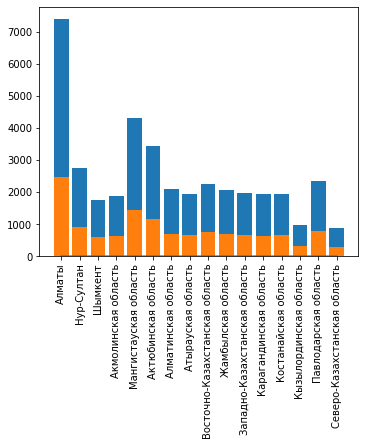

In [95]:
plt.bar(res['Регионы'], res['Размер обуч'])
plt.bar(res['Регионы'], res['Размер теста'])
plt.tight_layout()
plt.plot(res['Регионы'], res['R2'])
plt.xticks(rotation=90);

In [96]:
from sklearn.experimental import enable_hist_gradient_boosting

In [97]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [98]:
df2 = preprocessing_almaty(df)


Preprocessing of data Almaty: 100%|███████████████████████████████████████████████████| 11/11 [00:00<00:00, 591.88it/s]


In [100]:
X = pd.get_dummies(df2.drop('price', axis=1))
y = df2[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [144]:
hist = HistGradientBoostingRegressor(learning_rate=0.2)
hist.fit(X_train, y_train)

HistGradientBoostingRegressor(l2_regularization=0.0, learning_rate=0.2,
                              loss='least_squares', max_bins=255,
                              max_depth=None, max_iter=100, max_leaf_nodes=31,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)

In [145]:
y_pred = hist.predict(X_test)
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(0.8889193395121037, 3583086.1769038877)